In [1]:
import numpy as np
import pandas as pd
import pickle as pkl

from matplotlib import pyplot as plt

In [2]:
def get_scenario_results():
    result_df = pd.DataFrame()
    for scenario_number in [1, 2, 3, 4]:
        for dev_texts in [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]:

            for fold in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:

                with open(f'../data/results/scenario_{scenario_number}/results_{scenario_number}_{dev_texts}_{fold}.pkl', 'rb') as f:
                    data = pkl.load(f)

                result_df = result_df.append({'scenario': scenario_number,
                                              'dev_texts': dev_texts,
                                              'fold': fold,
                                              '0_precision': data['0']['precision'],
                                              '0_recall': data['0']['recall'],
                                              '0_f1-score': data['0']['f1-score'],
                                              '0_support': data['0']['support'],
                                              '1_precision': data['1']['precision'],
                                              '1_recall': data['1']['recall'],
                                              '1_f1-score': data['1']['f1-score'],
                                              '1_support': data['1']['support'],
                                              'accuracy': data['accuracy'],
                                              'macro_avg_precision': data['macro avg']['precision'],
                                              'macro_avg_recall': data['macro avg']['recall'],
                                              'macro_avg_f1-score': data['macro avg']['f1-score'],
                                              'macro_avg_support': data['macro avg']['support'],
                                              'weighted_avg_precision': data['weighted avg']['precision'],
                                              'weighted_avg_recall': data['weighted avg']['recall'],
                                              'weighted_avg_f1-score': data['weighted avg']['f1-score'],
                                              'weighted_avg_support': data['weighted avg']['support']}, 
                                             ignore_index=True)
            
    return result_df

In [3]:
df = get_scenario_results()
df

,0_f1-score,0_precision,0_recall,0_support,1_f1-score,1_precision,1_recall,1_support,accuracy,dev_texts,fold,macro_avg_f1-score,macro_avg_precision,macro_avg_recall,macro_avg_support,scenario,weighted_avg_f1-score,weighted_avg_precision,weighted_avg_recall,weighted_avg_support
0,0.911423,0.855900,0.974651,24419.0,0.441304,0.746934,0.313164,5834.0,0.847090,0.0,1.0,0.676364,0.801417,0.643908,30253.0,1.0,0.820765,0.834887,0.847090,30253.0
1,0.918271,0.868029,0.974687,24928.0,0.464264,0.748104,0.336566,5568.0,0.858178,0.0,2.0,0.691267,0.808066,0.655627,30496.0,1.0,0.835378,0.846133,0.858178,30496.0
2,0.916471,0.864009,0.975716,25408.0,0.460804,0.757849,0.331047,5833.0,0.855350,0.0,3.0,0.688638,0.810929,0.653382,31241.0,1.0,0.831394,0.844188,0.855350,31241.0
3,0.910116,0.854095,0.974001,25116.0,0.457323,0.757159,0.327595,6215.0,0.845776,0.0,4.0,0.683719,0.805627,0.650798,31331.0,1.0,0.820297,0.834866,0.845776,31331.0
4,0.923245,0.876371,0.975417,25058.0,0.470005,0.745244,0.343238,5250.0,0.865910,0.0,5.0,0.696625,0.810808,0.659328,30308.0,1.0,0.844734,0.853657,0.865910,30308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0.917120,0.865888,0.974795,23884.0,0.462854,0.750725,0.334564,5419.0,0.856397,20.0,6.0,0.689987,0.808306,0.654679,29303.0,4.0,0.833112,0.844591,0.856397,29303.0
436,0.914811,0.864998,0.970711,24924.0,0.476412,0.737410,0.351871,5826.0,0.853463,20.0,7.0,0.695611,0.801204,0.661291,30750.0,4.0,0.831750,0.840825,0.853463,30750.0
437,0.922987,0.875018,0.976521,25086.0,0.485009,0.765712,0.354904,5424.0,0.866011,20.0,8.0,0.703998,0.820365,0.665712,30510.0,4.0,0.845124,0.855586,0.866011,30510.0
438,0.918696,0.870933,0.972002,25145.0,0.495216,0.750885,0.369429,5744.0,0.859950,20.0,9.0,0.706956,0.810909,0.670716,30889.0,4.0,0.839948,0.848609,0.859950,30889.0


<h3>Scenario 1 plots (most controversial, random class (0 and 1) distribution)</h3>

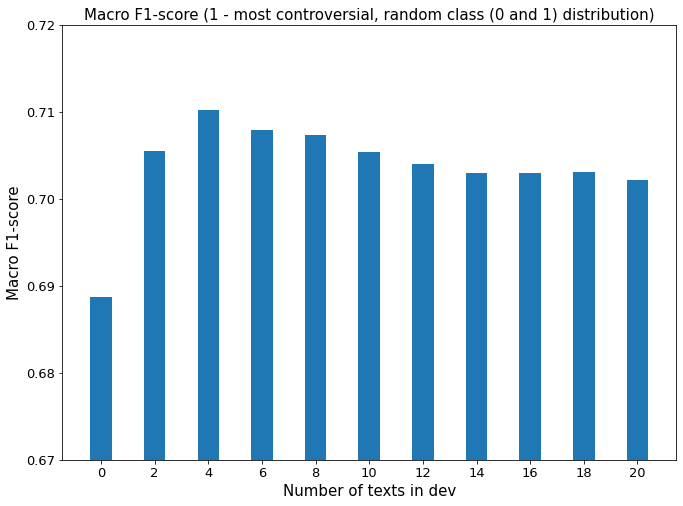

In [73]:
# macro f1-score plot for scenario 1
dev_texts_list = np.empty(11, dtype=np.int64)
avg_f1_scores = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    dev_texts_list[dev_texts // 2] = dev_texts
    avg_f1_scores[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    
# Function to plot  
plt.bar(dev_texts_list, avg_f1_scores)

plt.title('Macro F1-score (1 - most controversial, random class (0 and 1) distribution)', fontsize=15)
plt.xlabel("Number of texts in dev", fontsize=15)
plt.ylabel("Macro F1-score", fontsize=15)
plt.xticks(list(range(0, 21, 2)), dev_texts_list)
plt.ylim(0.67, 0.72)
fig = plt.gcf()
fig.set_size_inches(11,8)
  
# function to show the plot  
plt.show() 

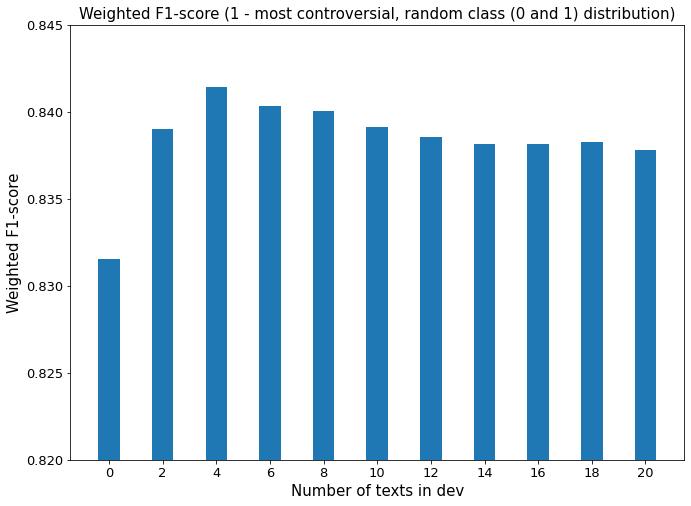

In [74]:
# weighted f1-score plot for scenario 1
dev_texts_list = np.empty(11, dtype=np.int64)
avg_f1_scores = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    dev_texts_list[dev_texts // 2] = dev_texts
    avg_f1_scores[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    
# Function to plot  
plt.bar(dev_texts_list, avg_f1_scores)

plt.title('Weighted F1-score (1 - most controversial, random class (0 and 1) distribution)', fontsize=15)
plt.xlabel("Number of texts in dev", fontsize=15)
plt.ylabel("Weighted F1-score", fontsize=15)
plt.xticks(list(range(0, 21, 2)), dev_texts_list)
plt.ylim(0.82, 0.845)
fig = plt.gcf()
fig.set_size_inches(11,8)
  
# function to show the plot  
plt.show()

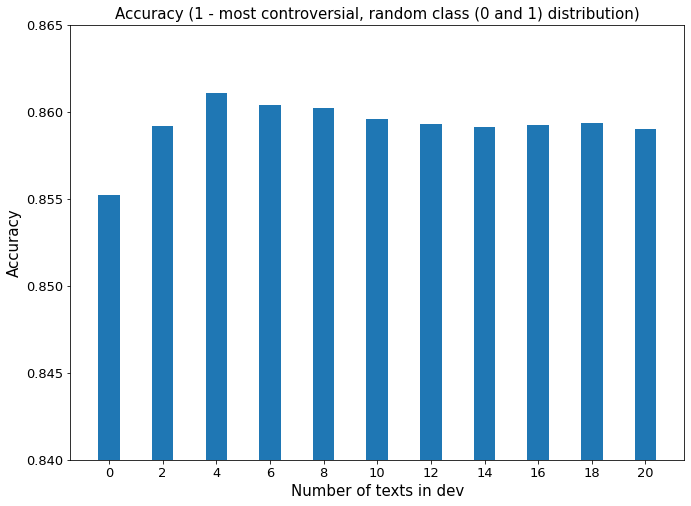

In [80]:
# accuracy plot for scenario 1
dev_texts_list = np.empty(11, dtype=np.int64)
avg_f1_scores = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    dev_texts_list[dev_texts // 2] = dev_texts
    avg_f1_scores[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    
# Function to plot  
plt.bar(dev_texts_list, avg_f1_scores)

plt.title('Accuracy (1 - most controversial, random class (0 and 1) distribution)', fontsize=15)
plt.xlabel("Number of texts in dev", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xticks(list(range(0, 21, 2)), dev_texts_list)
plt.ylim(0.84, 0.865)
fig = plt.gcf()
fig.set_size_inches(11,8)
  
# function to show the plot  
plt.show()

<h3>Scenario 2 plots (most aggressive, random class (0 and 1) distribution)</h3>

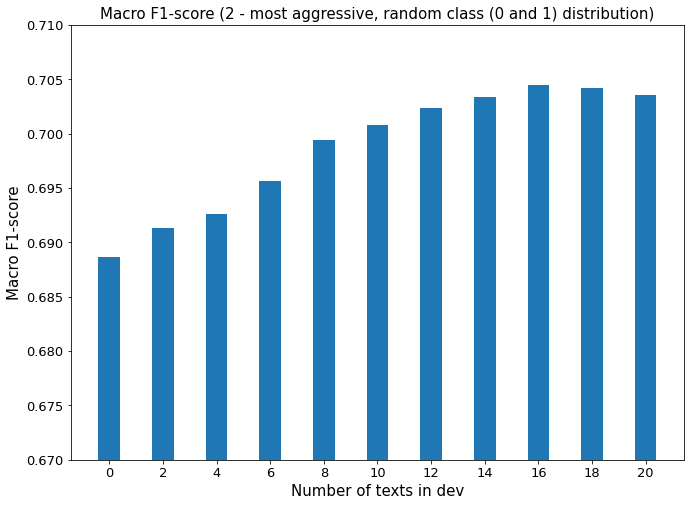

In [82]:
# macro f1-score plot for scenario 2
dev_texts_list = np.empty(11, dtype=np.int64)
avg_f1_scores = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    dev_texts_list[dev_texts // 2] = dev_texts
    avg_f1_scores[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    
# Function to plot  
plt.bar(dev_texts_list, avg_f1_scores)

plt.title('Macro F1-score (2 - most aggressive, random class (0 and 1) distribution)', fontsize=15)
plt.xlabel("Number of texts in dev", fontsize=15)
plt.ylabel("Macro F1-score", fontsize=15)
plt.xticks(list(range(0, 21, 2)), dev_texts_list)
plt.ylim(0.67, 0.71)
fig = plt.gcf()
fig.set_size_inches(11,8)
  
# function to show the plot  
plt.show() 

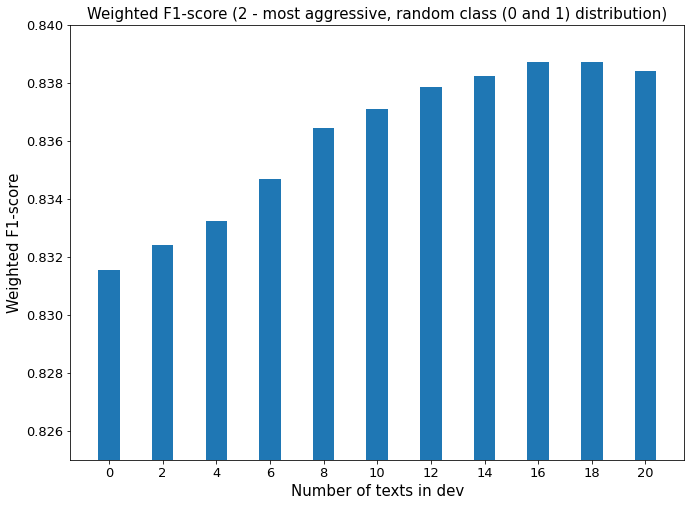

In [84]:
# weighted f1-score plot for scenario 2
dev_texts_list = np.empty(11, dtype=np.int64)
avg_f1_scores = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    dev_texts_list[dev_texts // 2] = dev_texts
    avg_f1_scores[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    
# Function to plot  
plt.bar(dev_texts_list, avg_f1_scores)

plt.title('Weighted F1-score (2 - most aggressive, random class (0 and 1) distribution)', fontsize=15)
plt.xlabel("Number of texts in dev", fontsize=15)
plt.ylabel("Weighted F1-score", fontsize=15)
plt.xticks(list(range(0, 21, 2)), dev_texts_list)
plt.ylim(0.825, 0.84)
fig = plt.gcf()
fig.set_size_inches(11,8)
  
# function to show the plot  
plt.show()

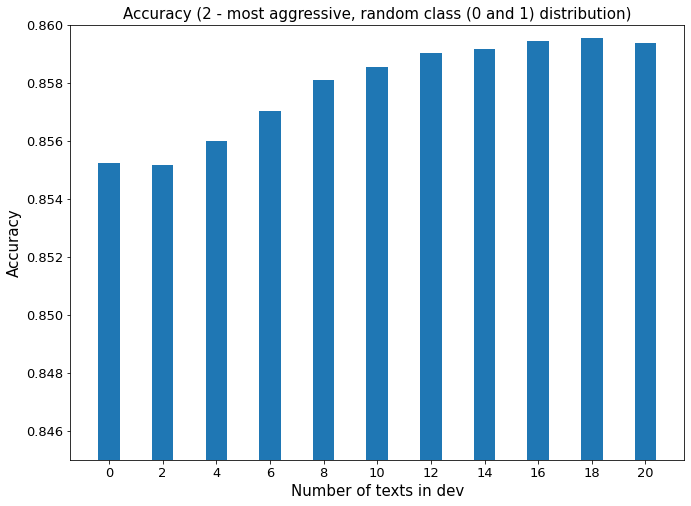

In [86]:
# accuracy plot for scenario 2
dev_texts_list = np.empty(11, dtype=np.int64)
avg_f1_scores = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    dev_texts_list[dev_texts // 2] = dev_texts
    avg_f1_scores[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    
# Function to plot  
plt.bar(dev_texts_list, avg_f1_scores)

plt.title('Accuracy (2 - most aggressive, random class (0 and 1) distribution)', fontsize=15)
plt.xlabel("Number of texts in dev", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xticks(list(range(0, 21, 2)), dev_texts_list)
plt.ylim(0.845, 0.860)
fig = plt.gcf()
fig.set_size_inches(11,8)
  
# function to show the plot  
plt.show()

<h3>Scenario 3 plots (most controversial, equal class (0 and 1) distribution)</h3>

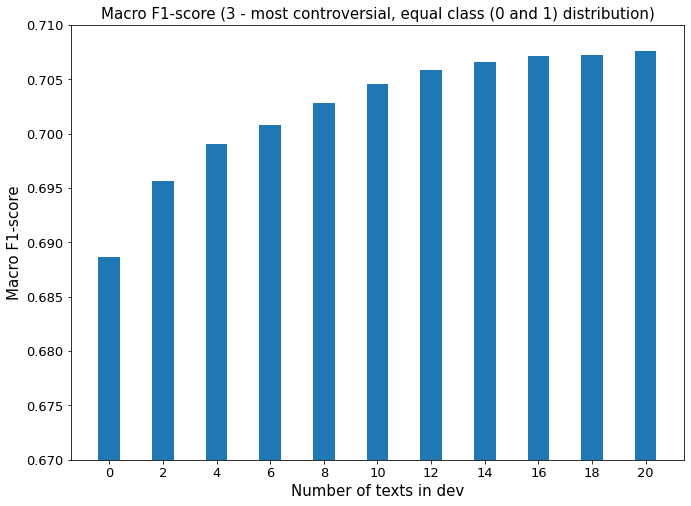

In [87]:
# macro f1-score plot for scenario 3
dev_texts_list = np.empty(11, dtype=np.int64)
avg_f1_scores = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    dev_texts_list[dev_texts // 2] = dev_texts
    avg_f1_scores[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    
# Function to plot  
plt.bar(dev_texts_list, avg_f1_scores)

plt.title('Macro F1-score (3 - most controversial, equal class (0 and 1) distribution)', fontsize=15)
plt.xlabel("Number of texts in dev", fontsize=15)
plt.ylabel("Macro F1-score", fontsize=15)
plt.xticks(list(range(0, 21, 2)), dev_texts_list)
plt.ylim(0.67, 0.71)
fig = plt.gcf()
fig.set_size_inches(11,8)
  
# function to show the plot  
plt.show() 

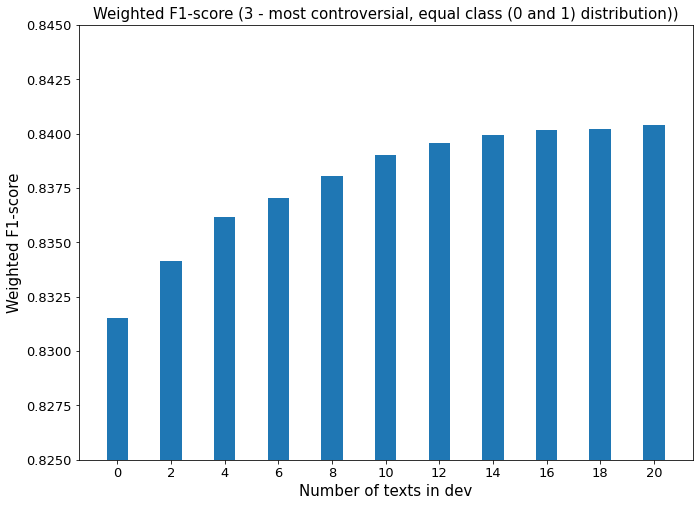

In [91]:
# weighted f1-score plot for scenario 3
dev_texts_list = np.empty(11, dtype=np.int64)
avg_f1_scores = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    dev_texts_list[dev_texts // 2] = dev_texts
    avg_f1_scores[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    
# Function to plot  
plt.bar(dev_texts_list, avg_f1_scores)

plt.title('Weighted F1-score (3 - most controversial, equal class (0 and 1) distribution))', fontsize=15)
plt.xlabel("Number of texts in dev", fontsize=15)
plt.ylabel("Weighted F1-score", fontsize=15)
plt.xticks(list(range(0, 21, 2)), dev_texts_list)
plt.ylim(0.825, 0.845)
fig = plt.gcf()
fig.set_size_inches(11,8)
  
# function to show the plot  
plt.show()

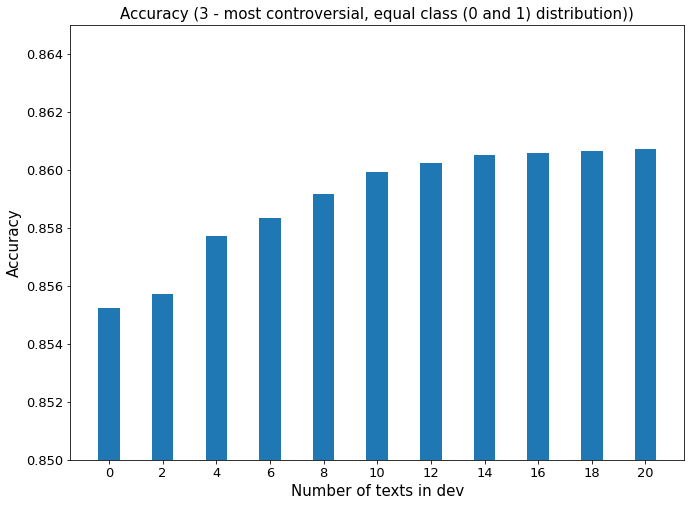

In [95]:
# accuracy plot for scenario 3
dev_texts_list = np.empty(11, dtype=np.int64)
avg_f1_scores = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    dev_texts_list[dev_texts // 2] = dev_texts
    avg_f1_scores[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    
# Function to plot  
plt.bar(dev_texts_list, avg_f1_scores)

plt.title('Accuracy (3 - most controversial, equal class (0 and 1) distribution))', fontsize=15)
plt.xlabel("Number of texts in dev", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xticks(list(range(0, 21, 2)), dev_texts_list)
plt.ylim(0.85, 0.865)
fig = plt.gcf()
fig.set_size_inches(11,8)
  
# function to show the plot  
plt.show()

<h3>Scenario 4 plots (random, equal class (0 and 1) distribution)</h3>

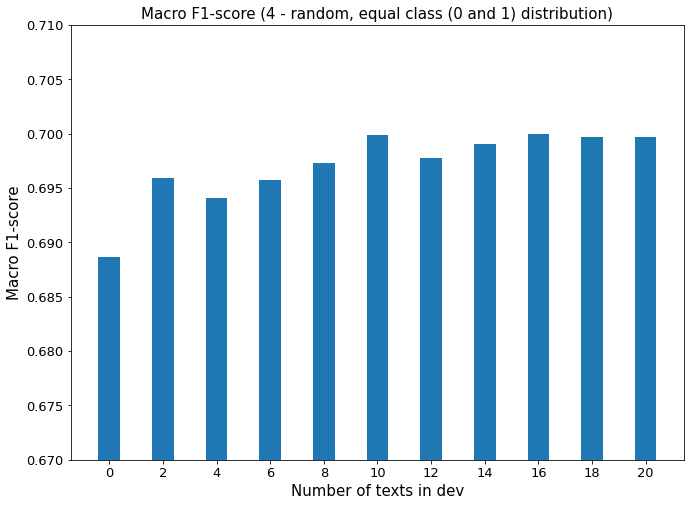

In [88]:
# macro f1-score plot for scenario 4
dev_texts_list = np.empty(11, dtype=np.int64)
avg_f1_scores = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    dev_texts_list[dev_texts // 2] = dev_texts
    avg_f1_scores[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    
# Function to plot  
plt.bar(dev_texts_list, avg_f1_scores)

plt.title('Macro F1-score (4 - random, equal class (0 and 1) distribution)', fontsize=15)
plt.xlabel("Number of texts in dev", fontsize=15)
plt.ylabel("Macro F1-score", fontsize=15)
plt.xticks(list(range(0, 21, 2)), dev_texts_list)
plt.ylim(0.67, 0.71)
fig = plt.gcf()
fig.set_size_inches(11,8)
  
# function to show the plot  
plt.show() 

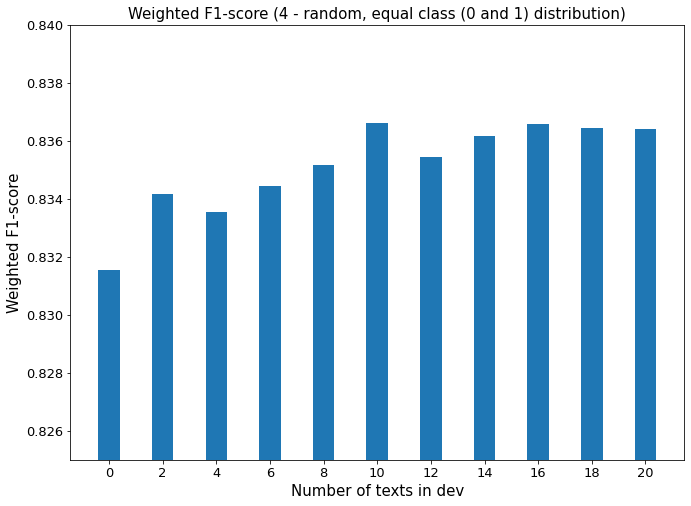

In [100]:
# weighted f1-score plot for scenario 4
dev_texts_list = np.empty(11, dtype=np.int64)
avg_f1_scores = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    dev_texts_list[dev_texts // 2] = dev_texts
    avg_f1_scores[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    
# Function to plot  
plt.bar(dev_texts_list, avg_f1_scores)

plt.title('Weighted F1-score (4 - random, equal class (0 and 1) distribution)', fontsize=15)
plt.xlabel("Number of texts in dev", fontsize=15)
plt.ylabel("Weighted F1-score", fontsize=15)
plt.xticks(list(range(0, 21, 2)), dev_texts_list)
plt.ylim(0.825, 0.84)
fig = plt.gcf()
fig.set_size_inches(11,8)
  
# function to show the plot  
plt.show()

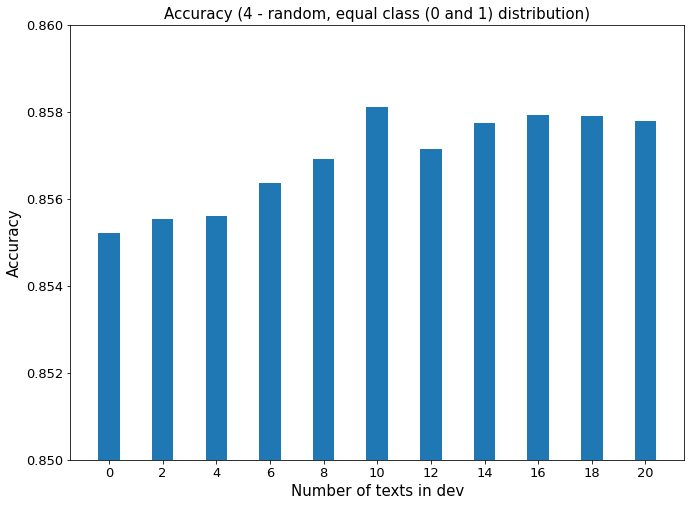

In [102]:
# accuracy plot for scenario 4
dev_texts_list = np.empty(11, dtype=np.int64)
avg_f1_scores = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    dev_texts_list[dev_texts // 2] = dev_texts
    avg_f1_scores[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    
# Function to plot  
plt.bar(dev_texts_list, avg_f1_scores)

plt.title('Accuracy (4 - random, equal class (0 and 1) distribution)', fontsize=15)
plt.xlabel("Number of texts in dev", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xticks(list(range(0, 21, 2)), dev_texts_list)
plt.ylim(0.85, 0.86)
fig = plt.gcf()
fig.set_size_inches(11,8)
  
# function to show the plot  
plt.show()

<h3>Plots containing multiple data series</h3>

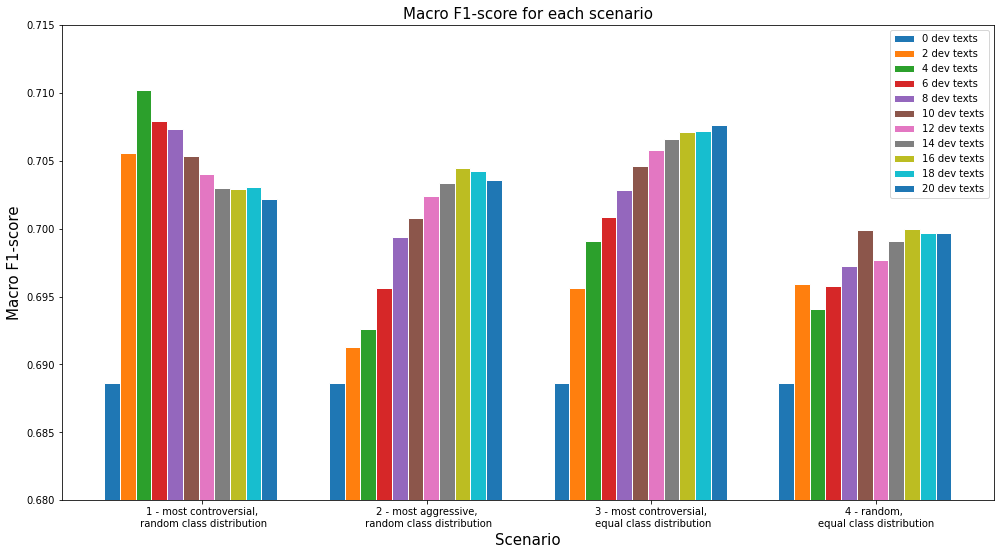

In [30]:
# macro f1-score for each scenario
avg_f1_scores_s_1 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_2 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_3 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_4 = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    avg_f1_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    avg_f1_scores_s_2[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    avg_f1_scores_s_3[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    avg_f1_scores_s_4[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()

width = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(1, 21, 5)

avg_f1_scores = [avg_f1_scores_s_1, avg_f1_scores_s_2, avg_f1_scores_s_3, avg_f1_scores_s_4]

plt.bar(r1, [score[0] for score in avg_f1_scores], width=width, edgecolor='white', label='0 dev texts')
plt.bar(r1 + 0.35, [score[1] for score in avg_f1_scores], width=width, edgecolor='white', label='2 dev texts')
plt.bar(r1 + 2*0.35, [score[2] for score in avg_f1_scores], width=width, edgecolor='white', label='4 dev texts')
plt.bar(r1 + 3*0.35, [score[3] for score in avg_f1_scores], width=width, edgecolor='white', label='6 dev texts')
plt.bar(r1 + 4*0.35, [score[4] for score in avg_f1_scores], width=width, edgecolor='white', label='8 dev texts')
plt.bar(r1 + 5*0.35, [score[5] for score in avg_f1_scores], width=width, edgecolor='white', label='10 dev texts')
plt.bar(r1 + 6*0.35, [score[6] for score in avg_f1_scores], width=width, edgecolor='white', label='12 dev texts')
plt.bar(r1 + 7*0.35, [score[7] for score in avg_f1_scores], width=width, edgecolor='white', label='14 dev texts')
plt.bar(r1 + 8*0.35, [score[8] for score in avg_f1_scores], width=width, edgecolor='white', label='16 dev texts')
plt.bar(r1 + 9*0.35, [score[9] for score in avg_f1_scores], width=width, edgecolor='white', label='18 dev texts')
plt.bar(r1 + 10*0.35, [score[10] for score in avg_f1_scores], width=width, edgecolor='white', label='20 dev texts')

plt.title('Macro F1-score for each scenario', fontsize=15)
plt.xlabel("Scenario", fontsize=15)
plt.ylabel("Macro F1-score", fontsize=15)
plt.xticks(list(range(3, 21, 5)), ['1 - most controversial,\n random class distribution',
                                   '2 - most aggressive,\n random class distribution',
                                   '3 - most controversial,\n equal class distribution',
                                   '4 - random, \nequal class distribution'])
plt.ylim(0.68, 0.715)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)


fig.tight_layout()
# plt.gcf().subplots_adjust(bottom=0.30)
# plt.savefig("macro_f1_each_scenario.png", dpi=300)

plt.show()

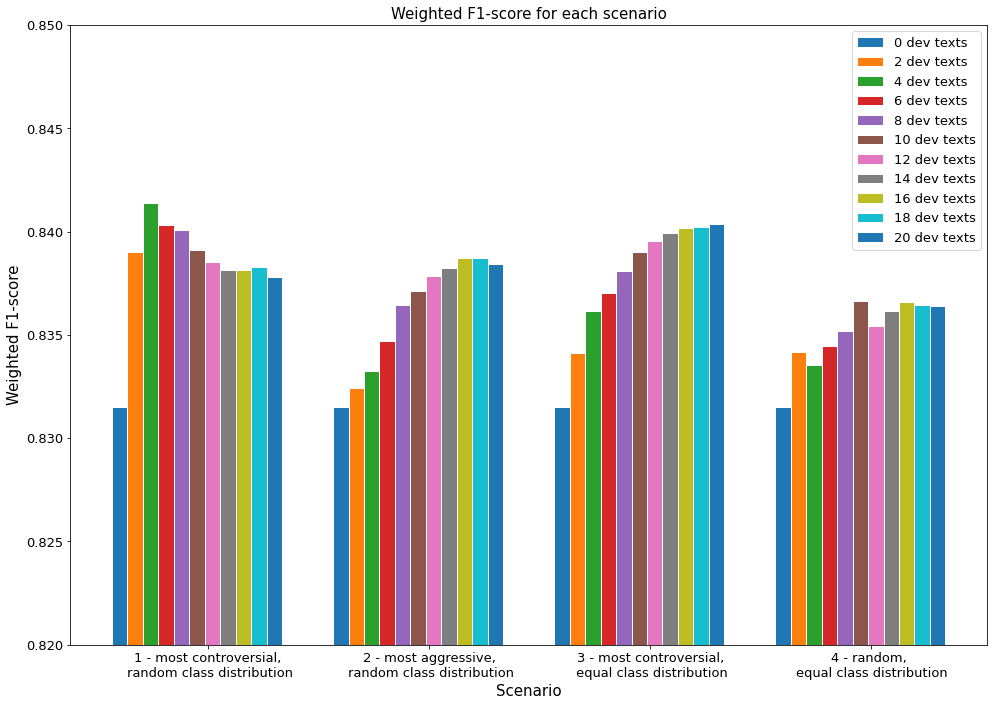

In [130]:
# weighted f1-score for each scenario
avg_f1_scores_s_1 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_2 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_3 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_4 = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    dev_texts_list[dev_texts // 2] = dev_texts
    avg_f1_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    avg_f1_scores_s_2[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    avg_f1_scores_s_3[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    avg_f1_scores_s_4[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()

width = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(1, 21, 5)

avg_f1_scores = [avg_f1_scores_s_1, avg_f1_scores_s_2, avg_f1_scores_s_3, avg_f1_scores_s_4]

plt.bar(r1, [score[0] for score in avg_f1_scores], width=width, edgecolor='white', label='0 dev texts')
plt.bar(r1 + 0.35, [score[1] for score in avg_f1_scores], width=width, edgecolor='white', label='2 dev texts')
plt.bar(r1 + 2*0.35, [score[2] for score in avg_f1_scores], width=width, edgecolor='white', label='4 dev texts')
plt.bar(r1 + 3*0.35, [score[3] for score in avg_f1_scores], width=width, edgecolor='white', label='6 dev texts')
plt.bar(r1 + 4*0.35, [score[4] for score in avg_f1_scores], width=width, edgecolor='white', label='8 dev texts')
plt.bar(r1 + 5*0.35, [score[5] for score in avg_f1_scores], width=width, edgecolor='white', label='10 dev texts')
plt.bar(r1 + 6*0.35, [score[6] for score in avg_f1_scores], width=width, edgecolor='white', label='12 dev texts')
plt.bar(r1 + 7*0.35, [score[7] for score in avg_f1_scores], width=width, edgecolor='white', label='14 dev texts')
plt.bar(r1 + 8*0.35, [score[8] for score in avg_f1_scores], width=width, edgecolor='white', label='16 dev texts')
plt.bar(r1 + 9*0.35, [score[9] for score in avg_f1_scores], width=width, edgecolor='white', label='18 dev texts')
plt.bar(r1 + 10*0.35, [score[10] for score in avg_f1_scores], width=width, edgecolor='white', label='20 dev texts')

plt.title('Weighted F1-score for each scenario', fontsize=15)
plt.xlabel("Scenario", fontsize=15)
plt.ylabel("Weighted F1-score", fontsize=15)
plt.xticks(list(range(3, 21, 5)), ['1 - most controversial,\n random class distribution',
                                   '2 - most aggressive,\n random class distribution',
                                   '3 - most controversial,\n equal class distribution',
                                   '4 - random, \nequal class distribution'])
plt.ylim(0.82, 0.85)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)


fig.tight_layout()

plt.show()

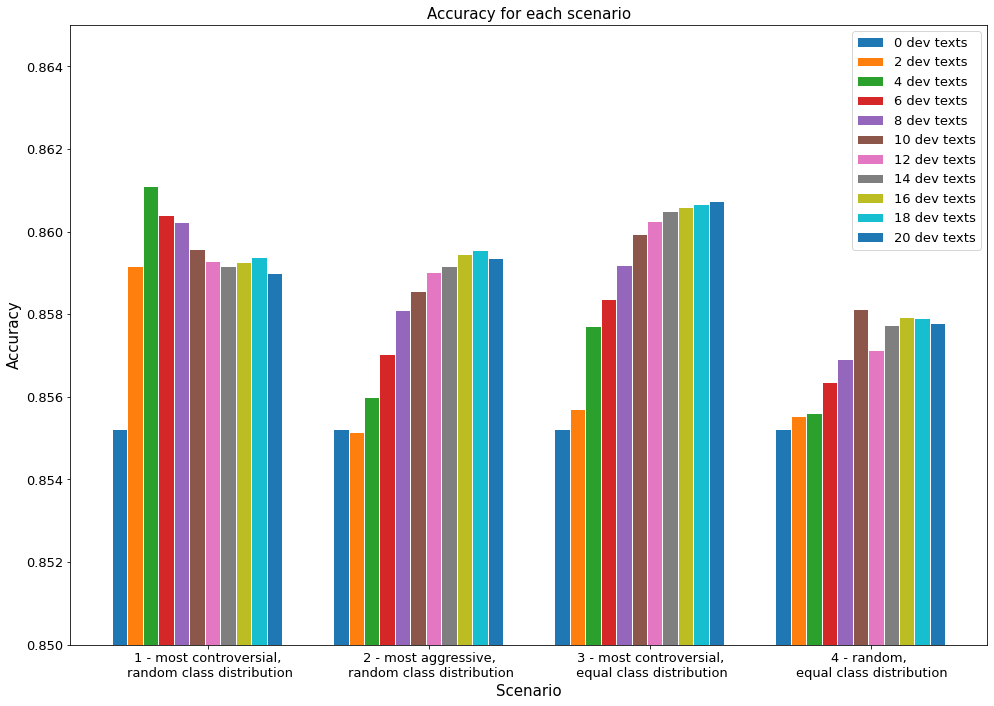

In [135]:
# accuracy for each scenario
accuracy_scores_s_1 = np.empty(11, dtype=np.float32)
accuracy_scores_s_2 = np.empty(11, dtype=np.float32)
accuracy_scores_s_3 = np.empty(11, dtype=np.float32)
accuracy_scores_s_4 = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    accuracy_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    accuracy_scores_s_2[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    accuracy_scores_s_3[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    accuracy_scores_s_4[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['accuracy'].mean()

width = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(1, 21, 5)

accuracy_scores = [accuracy_scores_s_1, accuracy_scores_s_2, accuracy_scores_s_3, accuracy_scores_s_4]

plt.bar(r1, [score[0] for score in accuracy_scores], width=width, edgecolor='white', label='0 dev texts')
plt.bar(r1 + 0.35, [score[1] for score in accuracy_scores], width=width, edgecolor='white', label='2 dev texts')
plt.bar(r1 + 2*0.35, [score[2] for score in accuracy_scores], width=width, edgecolor='white', label='4 dev texts')
plt.bar(r1 + 3*0.35, [score[3] for score in accuracy_scores], width=width, edgecolor='white', label='6 dev texts')
plt.bar(r1 + 4*0.35, [score[4] for score in accuracy_scores], width=width, edgecolor='white', label='8 dev texts')
plt.bar(r1 + 5*0.35, [score[5] for score in accuracy_scores], width=width, edgecolor='white', label='10 dev texts')
plt.bar(r1 + 6*0.35, [score[6] for score in accuracy_scores], width=width, edgecolor='white', label='12 dev texts')
plt.bar(r1 + 7*0.35, [score[7] for score in accuracy_scores], width=width, edgecolor='white', label='14 dev texts')
plt.bar(r1 + 8*0.35, [score[8] for score in accuracy_scores], width=width, edgecolor='white', label='16 dev texts')
plt.bar(r1 + 9*0.35, [score[9] for score in accuracy_scores], width=width, edgecolor='white', label='18 dev texts')
plt.bar(r1 + 10*0.35, [score[10] for score in accuracy_scores], width=width, edgecolor='white', label='20 dev texts')

plt.title('Accuracy for each scenario', fontsize=15)
plt.xlabel("Scenario", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xticks(list(range(3, 21, 5)), ['1 - most controversial,\n random class distribution',
                                   '2 - most aggressive,\n random class distribution',
                                   '3 - most controversial,\n equal class distribution',
                                   '4 - random, \nequal class distribution'])
plt.ylim(0.85, 0.865)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)


fig.tight_layout()

plt.show()

In [17]:
results_df = pd.DataFrame()

for scenario in [1, 2, 3, 4]:
    
    for metric in ['macro_avg_f1-score', 'weighted_avg_f1-score', 'accuracy']:
        
        # lists for metric values and std devs
        metric_avg = np.empty(11, dtype=np.float32)
        metric_std_dev = np.empty(11, dtype=np.float32)
        
        for dev_texts in range(0, 21, 2):
            metric_avg[dev_texts // 2] = df[(df.scenario == scenario) & (df.dev_texts == dev_texts)][metric].mean()
            metric_std_dev[dev_texts // 2] = df[(df.scenario == scenario) & (df.dev_texts == dev_texts)][metric].std()

        results_df = results_df.append({'scenario': scenario,
                                        'metric': metric,
                                        'dev_0': metric_avg[0],
                                        'dev_2': metric_avg[1],
                                        'dev_4': metric_avg[2],
                                        'dev_6': metric_avg[3],
                                        'dev_8': metric_avg[4],
                                        'dev_10': metric_avg[5],
                                        'dev_12': metric_avg[6],
                                        'dev_14': metric_avg[7],
                                        'dev_16': metric_avg[8],
                                        'dev_18': metric_avg[9],
                                        'dev_20': metric_avg[10]},
                                       ignore_index=True)

        if metric == 'macro_avg_f1-score':
            metric_std = 'macro_avg_f1_std_dev'
            
        if metric == 'weighted_avg_f1-score':
            metric_std = 'weighted_avg_f1_std_dev'
            
        if metric == 'accuracy':
            metric_std = 'accuracy_std_dev'
        
        results_df = results_df.append({'scenario': scenario,
                                        'metric': metric_std,
                                        'dev_0': metric_std_dev[0],
                                        'dev_2': metric_std_dev[1],
                                        'dev_4': metric_std_dev[2],
                                        'dev_6': metric_std_dev[3],
                                        'dev_8': metric_std_dev[4],
                                        'dev_10': metric_std_dev[5],
                                        'dev_12': metric_std_dev[6],
                                        'dev_14': metric_std_dev[7],
                                        'dev_16': metric_std_dev[8],
                                        'dev_18': metric_std_dev[9],
                                        'dev_20': metric_std_dev[10]},
                                       ignore_index=True)

results_df['scenario'] = results_df['scenario'].astype(int)

results_df = results_df.round({'dev_'+x: 3 for x in ['0', '2', '4', '6', '8', '10', '12', '14', '16', '18', '20']})

results_df = results_df[['scenario', 'metric', 'dev_0', 'dev_2', 'dev_4', 'dev_6', 'dev_8', 'dev_10', 'dev_12', 'dev_14',
                        'dev_16', 'dev_18', 'dev_20']]

results_df

,scenario,metric,dev_0,dev_2,dev_4,dev_6,dev_8,dev_10,dev_12,dev_14,dev_16,dev_18,dev_20
0,1,macro_avg_f1-score,0.689,0.706,0.710,0.708,0.707,0.705,0.704,0.703,0.703,0.703,0.702
1,1,macro_avg_f1_std_dev,0.007,0.006,0.006,0.008,0.005,0.006,0.006,0.005,0.006,0.005,0.005
2,1,weighted_avg_f1-score,0.832,0.839,0.841,0.840,0.840,0.839,0.839,0.838,0.838,0.838,0.838
3,1,weighted_avg_f1_std_dev,0.008,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.007,0.006
4,1,accuracy,0.855,0.859,0.861,0.860,0.860,0.860,0.859,0.859,0.859,0.859,0.859
5,1,accuracy_std_dev,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006,0.006
6,2,macro_avg_f1-score,0.689,0.691,0.693,0.696,0.699,0.701,0.702,0.703,0.704,0.704,0.704
7,2,macro_avg_f1_std_dev,0.007,0.006,0.005,0.006,0.005,0.006,0.007,0.005,0.006,0.005,0.004
8,2,weighted_avg_f1-score,0.832,0.832,0.833,0.835,0.836,0.837,0.838,0.838,0.839,0.839,0.838
9,2,weighted_avg_f1_std_dev,0.008,0.008,0.007,0.007,0.007,0.008,0.008,0.007,0.007,0.007,0.006


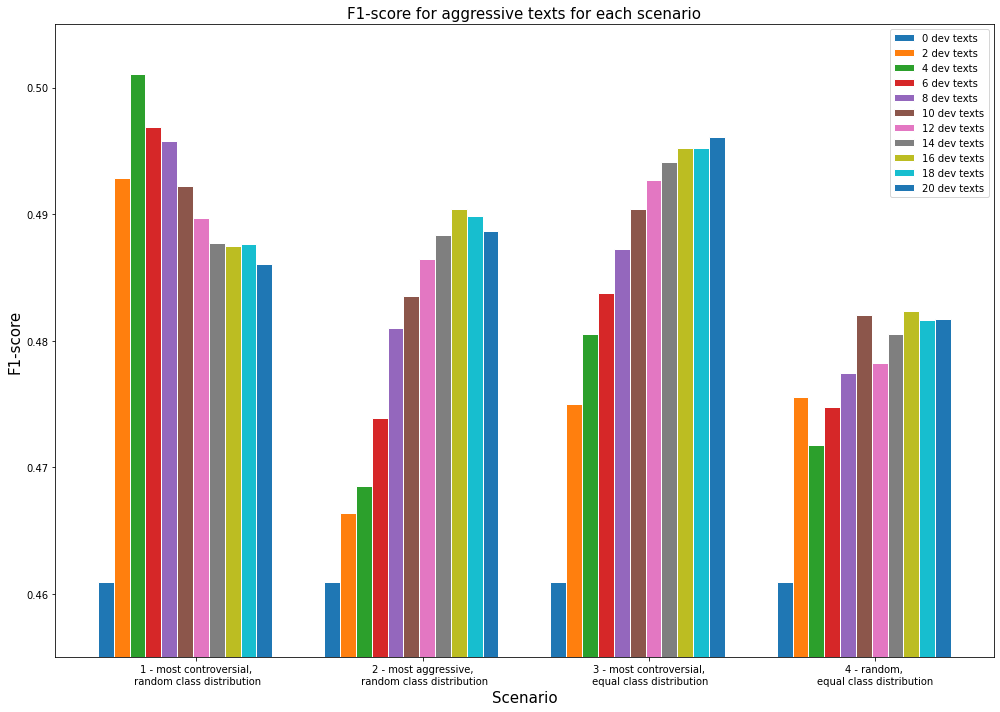

In [11]:
# f1-scores for aggressive texts for each scenario
accuracy_scores_s_1 = np.empty(11, dtype=np.float32)
accuracy_scores_s_2 = np.empty(11, dtype=np.float32)
accuracy_scores_s_3 = np.empty(11, dtype=np.float32)
accuracy_scores_s_4 = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    accuracy_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['1_f1-score'].mean()
    accuracy_scores_s_2[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['1_f1-score'].mean()
    accuracy_scores_s_3[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['1_f1-score'].mean()
    accuracy_scores_s_4[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['1_f1-score'].mean()

width = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(1, 21, 5)

accuracy_scores = [accuracy_scores_s_1, accuracy_scores_s_2, accuracy_scores_s_3, accuracy_scores_s_4]

plt.bar(r1, [score[0] for score in accuracy_scores], width=width, edgecolor='white', label='0 dev texts')
plt.bar(r1 + 0.35, [score[1] for score in accuracy_scores], width=width, edgecolor='white', label='2 dev texts')
plt.bar(r1 + 2*0.35, [score[2] for score in accuracy_scores], width=width, edgecolor='white', label='4 dev texts')
plt.bar(r1 + 3*0.35, [score[3] for score in accuracy_scores], width=width, edgecolor='white', label='6 dev texts')
plt.bar(r1 + 4*0.35, [score[4] for score in accuracy_scores], width=width, edgecolor='white', label='8 dev texts')
plt.bar(r1 + 5*0.35, [score[5] for score in accuracy_scores], width=width, edgecolor='white', label='10 dev texts')
plt.bar(r1 + 6*0.35, [score[6] for score in accuracy_scores], width=width, edgecolor='white', label='12 dev texts')
plt.bar(r1 + 7*0.35, [score[7] for score in accuracy_scores], width=width, edgecolor='white', label='14 dev texts')
plt.bar(r1 + 8*0.35, [score[8] for score in accuracy_scores], width=width, edgecolor='white', label='16 dev texts')
plt.bar(r1 + 9*0.35, [score[9] for score in accuracy_scores], width=width, edgecolor='white', label='18 dev texts')
plt.bar(r1 + 10*0.35, [score[10] for score in accuracy_scores], width=width, edgecolor='white', label='20 dev texts')

plt.title('F1-score for aggressive texts for each scenario', fontsize=15)
plt.xlabel("Scenario", fontsize=15)
plt.ylabel("F1-score", fontsize=15)
plt.xticks(list(range(3, 21, 5)), ['1 - most controversial,\n random class distribution',
                                   '2 - most aggressive,\n random class distribution',
                                   '3 - most controversial,\n equal class distribution',
                                   '4 - random, \nequal class distribution'])
plt.ylim(0.455, 0.505)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)


fig.tight_layout()

plt.show()

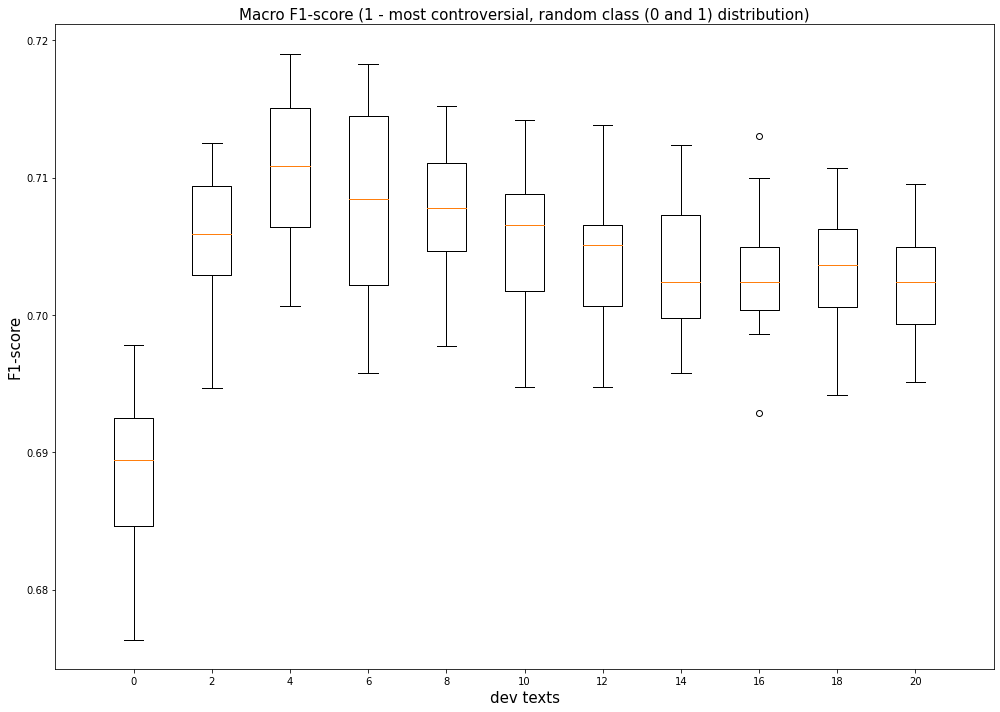

In [4]:
# box plot for 1st scenario
accuracy_scores_s_1 = np.empty((11, 10), dtype=np.float32)

for dev_texts in range(0, 21, 2):
    accuracy_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].tolist()

ticks = np.empty(11, dtype=np.int64)

for box_id in range(0, 11):
    plt.boxplot(accuracy_scores_s_1[box_id], positions=[box_id], widths=0.5)
    ticks[box_id] = box_id
    
plt.title('Macro F1-score (1 - most controversial, random class (0 and 1) distribution)', fontsize=15)
plt.xlabel("dev texts", fontsize=15)
plt.ylabel("F1-score", fontsize=15)
plt.xlim(-1,ticks[-1]+1) # need to shift the right end of the x limit by 1
plt.xticks(ticks, [str(x*2) for x in ticks])
fig = plt.gcf()
fig.set_size_inches(14,10)

fig.tight_layout()

plt.show()

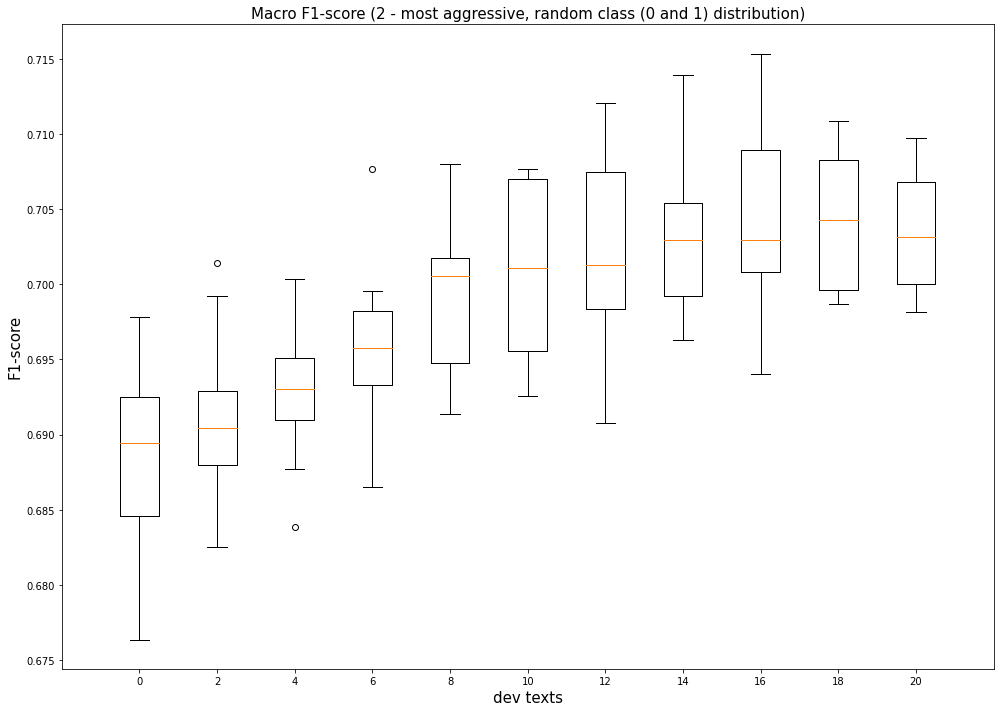

In [6]:
# box plot for 2nd scenario
accuracy_scores_s_1 = np.empty((11, 10), dtype=np.float32)

for dev_texts in range(0, 21, 2):
    accuracy_scores_s_1[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].tolist()

ticks = np.empty(11, dtype=np.int64)

for box_id in range(0, 11):
    plt.boxplot(accuracy_scores_s_1[box_id], positions=[box_id], widths=0.5)
    ticks[box_id] = box_id
    
plt.title('Macro F1-score (2 - most aggressive, random class (0 and 1) distribution)', fontsize=15)
plt.xlabel("dev texts", fontsize=15)
plt.ylabel("F1-score", fontsize=15)
plt.xlim(-1,ticks[-1]+1) # need to shift the right end of the x limit by 1
plt.xticks(ticks, [str(x*2) for x in ticks])
fig = plt.gcf()
fig.set_size_inches(14,10)

fig.tight_layout()

plt.show()

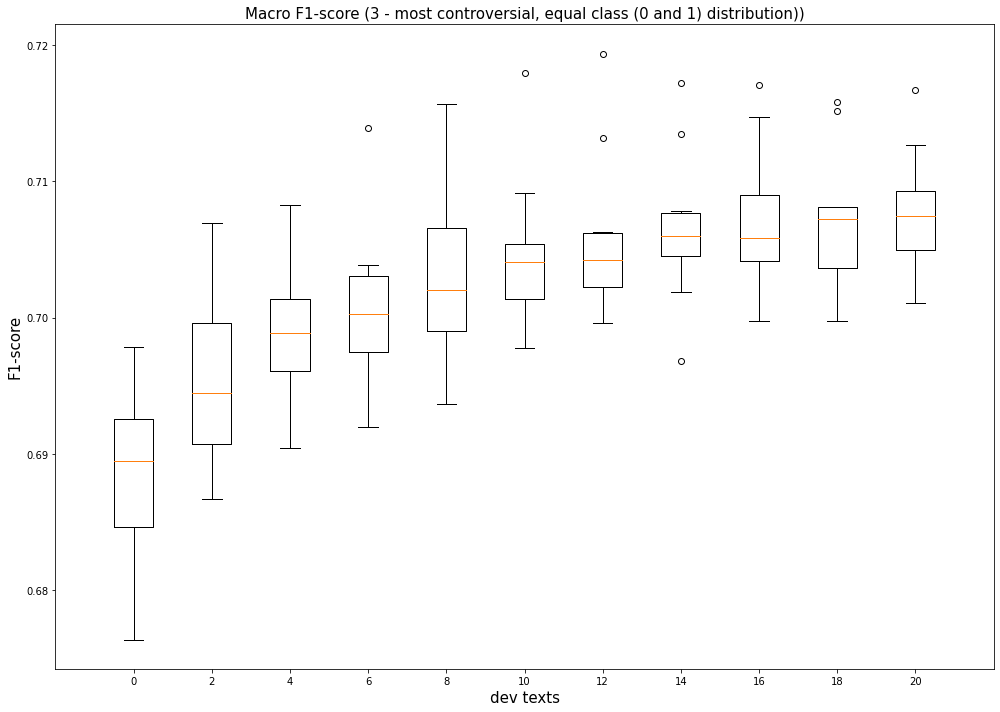

In [7]:
# box plot for 3rd scenario
accuracy_scores_s_1 = np.empty((11, 10), dtype=np.float32)

for dev_texts in range(0, 21, 2):
    accuracy_scores_s_1[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].tolist()

ticks = np.empty(11, dtype=np.int64)

for box_id in range(0, 11):
    plt.boxplot(accuracy_scores_s_1[box_id], positions=[box_id], widths=0.5)
    ticks[box_id] = box_id
    
plt.title('Macro F1-score (3 - most controversial, equal class (0 and 1) distribution))', fontsize=15)
plt.xlabel("dev texts", fontsize=15)
plt.ylabel("F1-score", fontsize=15)
plt.xlim(-1,ticks[-1]+1) # need to shift the right end of the x limit by 1
plt.xticks(ticks, [str(x*2) for x in ticks])
fig = plt.gcf()
fig.set_size_inches(14,10)

fig.tight_layout()

plt.show()

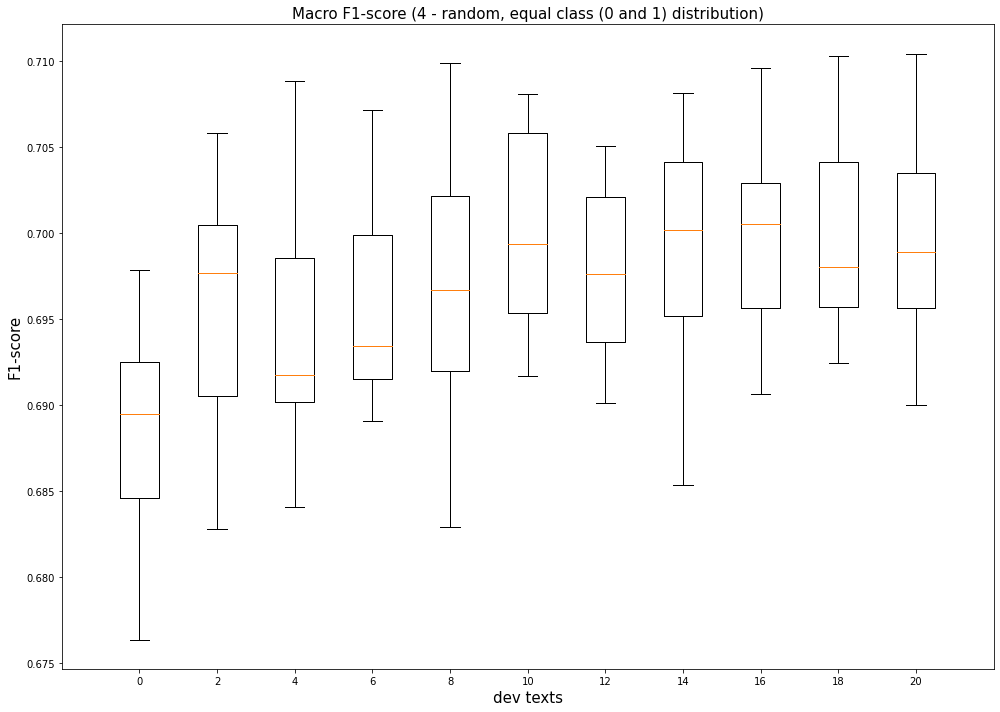

In [8]:
# box plot for 4th scenario
accuracy_scores_s_1 = np.empty((11, 10), dtype=np.float32)

for dev_texts in range(0, 21, 2):
    accuracy_scores_s_1[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].tolist()

ticks = np.empty(11, dtype=np.int64)

for box_id in range(0, 11):
    plt.boxplot(accuracy_scores_s_1[box_id], positions=[box_id], widths=0.5)
    ticks[box_id] = box_id
    
plt.title('Macro F1-score (4 - random, equal class (0 and 1) distribution)', fontsize=15)
plt.xlabel("dev texts", fontsize=15)
plt.ylabel("F1-score", fontsize=15)
plt.xlim(-1,ticks[-1]+1) # need to shift the right end of the x limit by 1
plt.xticks(ticks, [str(x*2) for x in ticks])
fig = plt.gcf()
fig.set_size_inches(14,10)

fig.tight_layout()

plt.show()

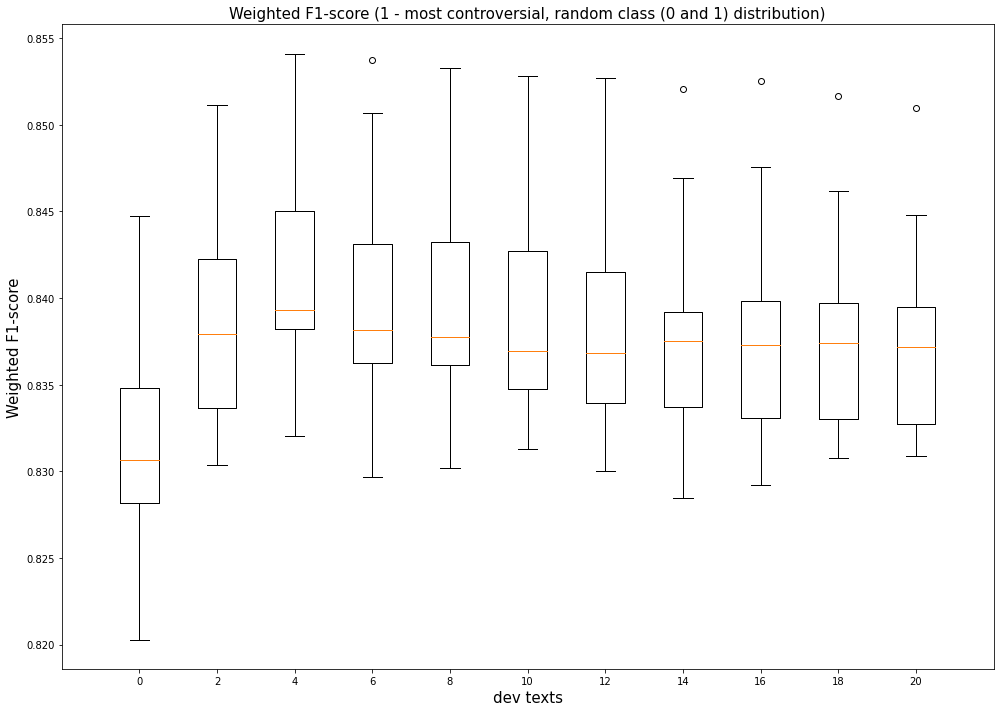

In [19]:
# box plot for 1st scenario (weighted f1-score)
accuracy_scores_s_1 = np.empty((11, 10), dtype=np.float32)

for dev_texts in range(0, 21, 2):
    accuracy_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].tolist()

ticks = np.empty(11, dtype=np.int64)

for box_id in range(0, 11):
    plt.boxplot(accuracy_scores_s_1[box_id], positions=[box_id], widths=0.5)
    ticks[box_id] = box_id
    
plt.title('Weighted F1-score (1 - most controversial, random class (0 and 1) distribution)', fontsize=15)
plt.xlabel("dev texts", fontsize=15)
plt.ylabel("Weighted F1-score", fontsize=15)
plt.xlim(-1,ticks[-1]+1) # need to shift the right end of the x limit by 1
plt.xticks(ticks, [str(x*2) for x in ticks])
fig = plt.gcf()
fig.set_size_inches(14,10)

fig.tight_layout()

plt.show()

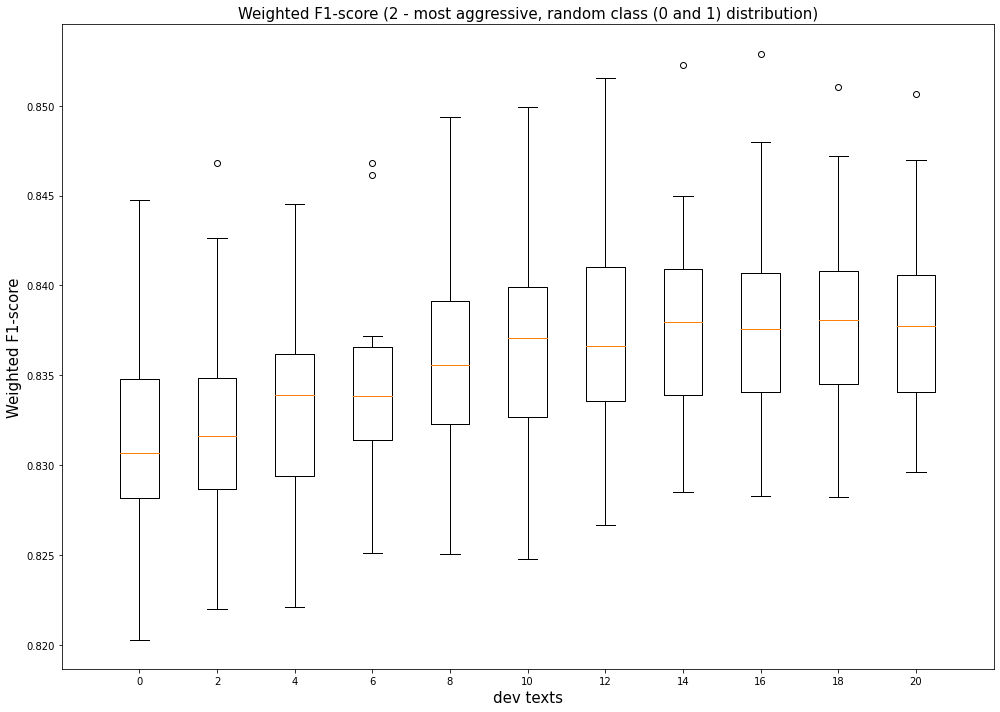

In [18]:
# box plot for 2nd scenario
accuracy_scores_s_1 = np.empty((11, 10), dtype=np.float32)

for dev_texts in range(0, 21, 2):
    accuracy_scores_s_1[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].tolist()

ticks = np.empty(11, dtype=np.int64)

for box_id in range(0, 11):
    plt.boxplot(accuracy_scores_s_1[box_id], positions=[box_id], widths=0.5)
    ticks[box_id] = box_id
    
plt.title('Weighted F1-score (2 - most aggressive, random class (0 and 1) distribution)', fontsize=15)
plt.xlabel("dev texts", fontsize=15)
plt.ylabel("Weighted F1-score", fontsize=15)
plt.xlim(-1,ticks[-1]+1) # need to shift the right end of the x limit by 1
plt.xticks(ticks, [str(x*2) for x in ticks])
fig = plt.gcf()
fig.set_size_inches(14,10)

fig.tight_layout()

plt.show()

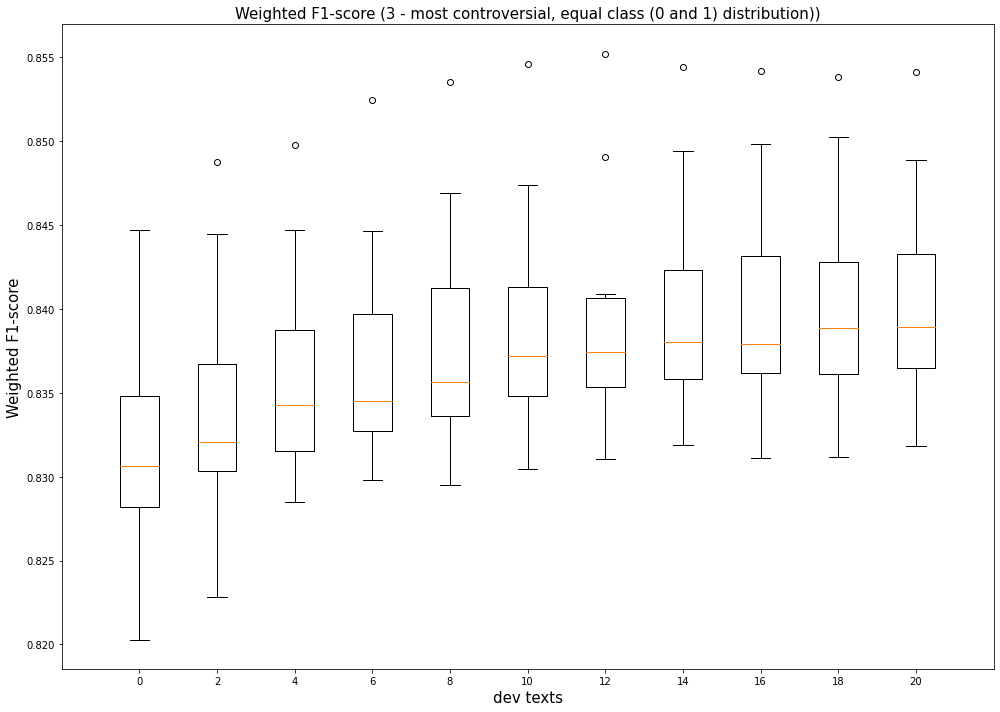

In [17]:
# box plot for 3rd scenario
accuracy_scores_s_1 = np.empty((11, 10), dtype=np.float32)

for dev_texts in range(0, 21, 2):
    accuracy_scores_s_1[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].tolist()

ticks = np.empty(11, dtype=np.int64)

for box_id in range(0, 11):
    plt.boxplot(accuracy_scores_s_1[box_id], positions=[box_id], widths=0.5)
    ticks[box_id] = box_id
    
plt.title('Weighted F1-score (3 - most controversial, equal class (0 and 1) distribution))', fontsize=15)
plt.xlabel("dev texts", fontsize=15)
plt.ylabel("Weighted F1-score", fontsize=15)
plt.xlim(-1,ticks[-1]+1) # need to shift the right end of the x limit by 1
plt.xticks(ticks, [str(x*2) for x in ticks])
fig = plt.gcf()
fig.set_size_inches(14,10)

fig.tight_layout()

plt.show()

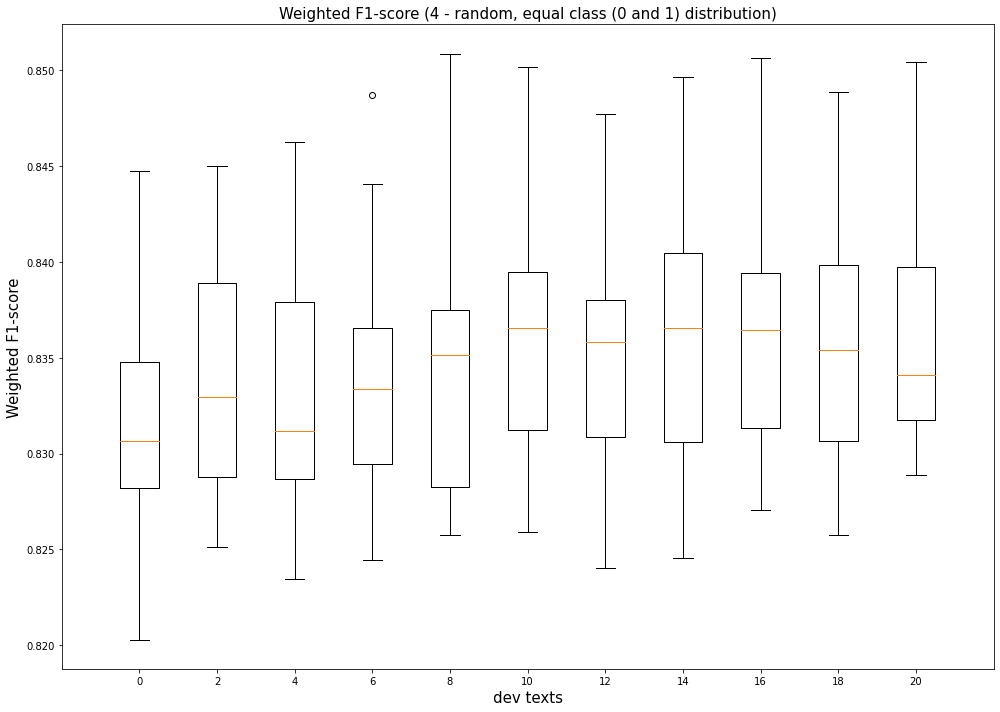

In [20]:
# box plot for 4th scenario
accuracy_scores_s_1 = np.empty((11, 10), dtype=np.float32)

for dev_texts in range(0, 21, 2):
    accuracy_scores_s_1[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].tolist()

ticks = np.empty(11, dtype=np.int64)

for box_id in range(0, 11):
    plt.boxplot(accuracy_scores_s_1[box_id], positions=[box_id], widths=0.5)
    ticks[box_id] = box_id
    
plt.title('Weighted F1-score (4 - random, equal class (0 and 1) distribution)', fontsize=15)
plt.xlabel("dev texts", fontsize=15)
plt.ylabel("Weighted F1-score", fontsize=15)
plt.xlim(-1,ticks[-1]+1) # need to shift the right end of the x limit by 1
plt.xticks(ticks, [str(x*2) for x in ticks])
fig = plt.gcf()
fig.set_size_inches(14,10)

fig.tight_layout()

plt.show()

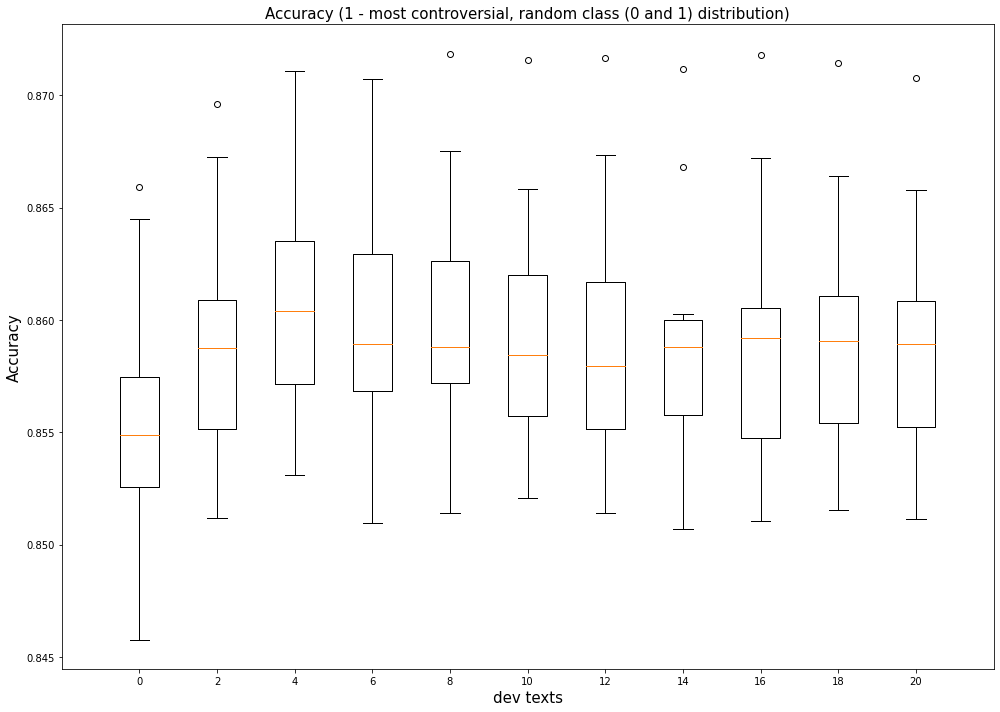

In [15]:
# box plot for 1st scenario (accuracy)
accuracy_scores_s_1 = np.empty((11, 10), dtype=np.float32)

for dev_texts in range(0, 21, 2):
    accuracy_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['accuracy'].tolist()

ticks = np.empty(11, dtype=np.int64)

for box_id in range(0, 11):
    plt.boxplot(accuracy_scores_s_1[box_id], positions=[box_id], widths=0.5)
    ticks[box_id] = box_id
    
plt.title('Accuracy (1 - most controversial, random class (0 and 1) distribution)', fontsize=15)
plt.xlabel("dev texts", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xlim(-1,ticks[-1]+1) # need to shift the right end of the x limit by 1
plt.xticks(ticks, [str(x*2) for x in ticks])
fig = plt.gcf()
fig.set_size_inches(14,10)

fig.tight_layout()

plt.show()

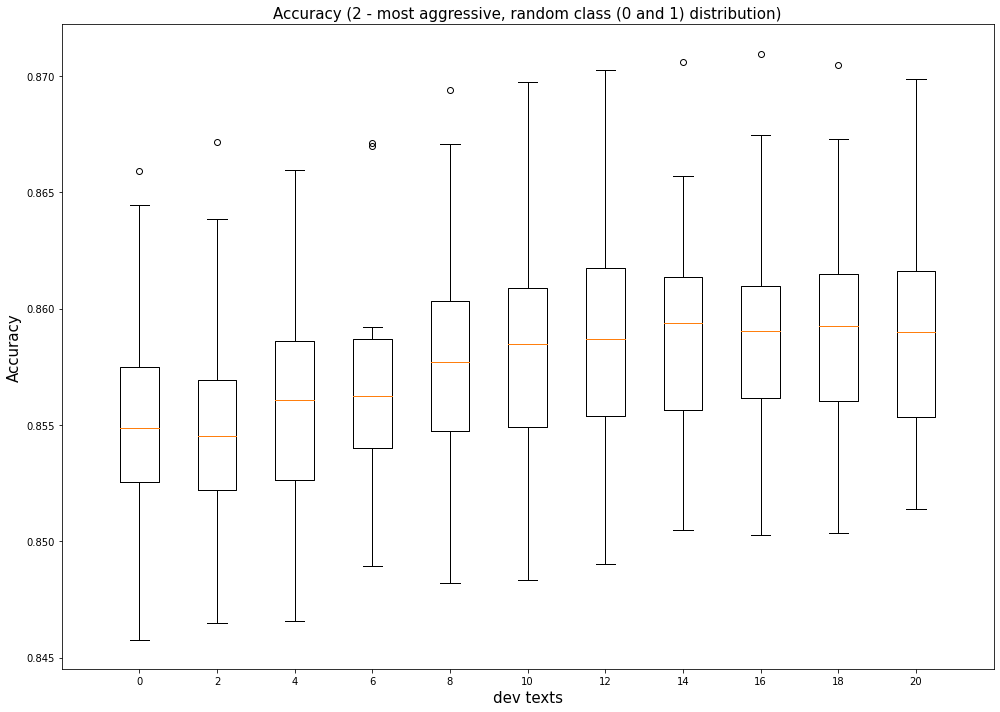

In [16]:
# box plot for 2nd scenario
accuracy_scores_s_1 = np.empty((11, 10), dtype=np.float32)

for dev_texts in range(0, 21, 2):
    accuracy_scores_s_1[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['accuracy'].tolist()

ticks = np.empty(11, dtype=np.int64)

for box_id in range(0, 11):
    plt.boxplot(accuracy_scores_s_1[box_id], positions=[box_id], widths=0.5)
    ticks[box_id] = box_id
    
plt.title('Accuracy (2 - most aggressive, random class (0 and 1) distribution)', fontsize=15)
plt.xlabel("dev texts", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xlim(-1,ticks[-1]+1) # need to shift the right end of the x limit by 1
plt.xticks(ticks, [str(x*2) for x in ticks])
fig = plt.gcf()
fig.set_size_inches(14,10)

fig.tight_layout()

plt.show()

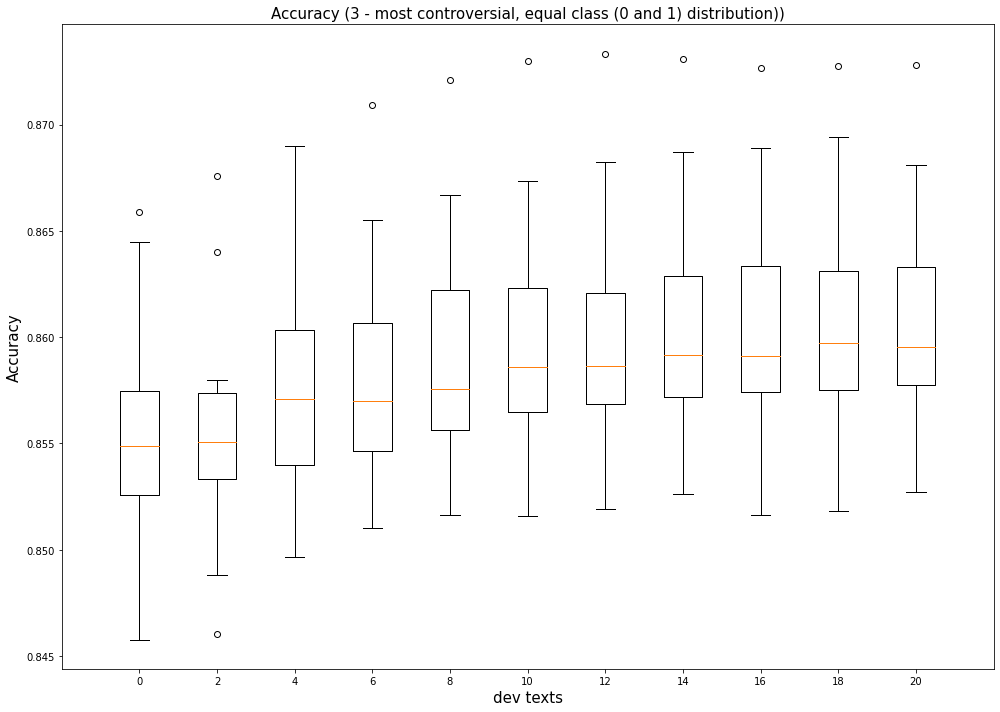

In [21]:
# box plot for 3rd scenario
accuracy_scores_s_1 = np.empty((11, 10), dtype=np.float32)

for dev_texts in range(0, 21, 2):
    accuracy_scores_s_1[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['accuracy'].tolist()

ticks = np.empty(11, dtype=np.int64)

for box_id in range(0, 11):
    plt.boxplot(accuracy_scores_s_1[box_id], positions=[box_id], widths=0.5)
    ticks[box_id] = box_id
    
plt.title('Accuracy (3 - most controversial, equal class (0 and 1) distribution))', fontsize=15)
plt.xlabel("dev texts", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xlim(-1,ticks[-1]+1) # need to shift the right end of the x limit by 1
plt.xticks(ticks, [str(x*2) for x in ticks])
fig = plt.gcf()
fig.set_size_inches(14,10)

fig.tight_layout()

plt.show()

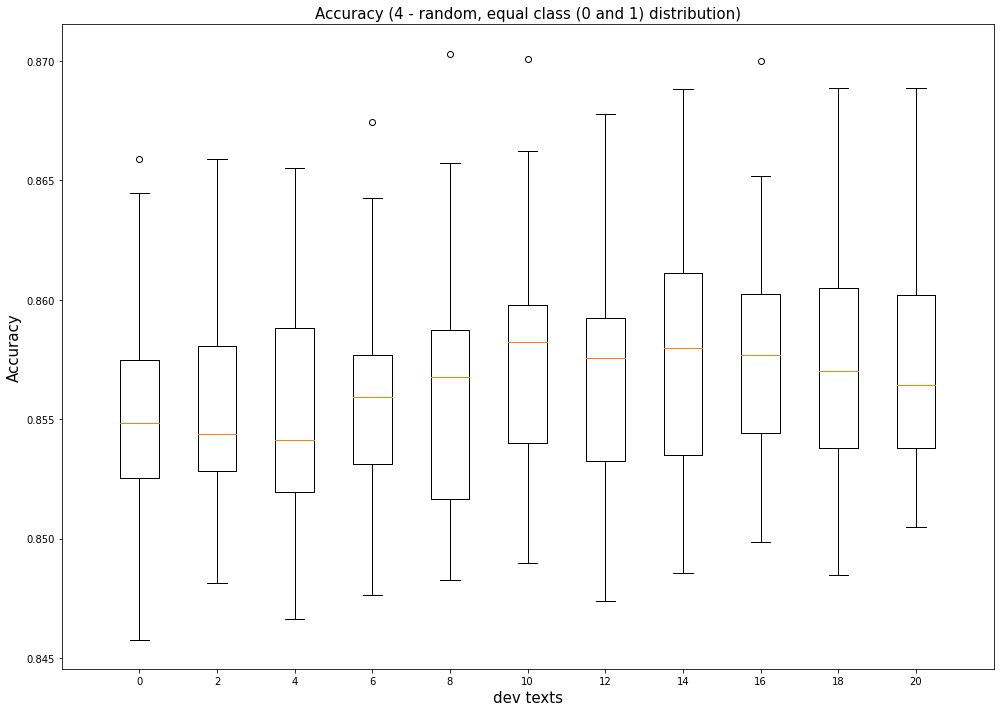

In [22]:
# box plot for 4th scenario
accuracy_scores_s_1 = np.empty((11, 10), dtype=np.float32)

for dev_texts in range(0, 21, 2):
    accuracy_scores_s_1[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['accuracy'].tolist()

ticks = np.empty(11, dtype=np.int64)

for box_id in range(0, 11):
    plt.boxplot(accuracy_scores_s_1[box_id], positions=[box_id], widths=0.5)
    ticks[box_id] = box_id
    
plt.title('Accuracy (4 - random, equal class (0 and 1) distribution)', fontsize=15)
plt.xlabel("dev texts", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xlim(-1,ticks[-1]+1) # need to shift the right end of the x limit by 1
plt.xticks(ticks, [str(x*2) for x in ticks])
fig = plt.gcf()
fig.set_size_inches(14,10)

fig.tight_layout()

plt.show()

<h3>Results on texts with entropy >= 0.1</h3>

In [17]:
def get_scenario_results():
    result_df = pd.DataFrame()
    for scenario_number in [1, 2, 3, 4]:
        for dev_texts in [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]:

            for fold in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:

                with open(f'../data/controversial_results/scenario_{scenario_number}/controversial_results_{scenario_number}_{dev_texts}_{fold}.pkl', 'rb') as f:
                    data = pkl.load(f)

                result_df = result_df.append({'scenario': scenario_number,
                                              'dev_texts': dev_texts,
                                              'fold': fold,
                                              '0_precision': data['0']['precision'],
                                              '0_recall': data['0']['recall'],
                                              '0_f1-score': data['0']['f1-score'],
                                              '0_support': data['0']['support'],
                                              '1_precision': data['1']['precision'],
                                              '1_recall': data['1']['recall'],
                                              '1_f1-score': data['1']['f1-score'],
                                              '1_support': data['1']['support'],
                                              'accuracy': data['accuracy'],
                                              'macro_avg_precision': data['macro avg']['precision'],
                                              'macro_avg_recall': data['macro avg']['recall'],
                                              'macro_avg_f1-score': data['macro avg']['f1-score'],
                                              'macro_avg_support': data['macro avg']['support'],
                                              'weighted_avg_precision': data['weighted avg']['precision'],
                                              'weighted_avg_recall': data['weighted avg']['recall'],
                                              'weighted_avg_f1-score': data['weighted avg']['f1-score'],
                                              'weighted_avg_support': data['weighted avg']['support']}, 
                                             ignore_index=True)
            
    return result_df

In [16]:
import os
arr = os.listdir('../JIPM_LR')
print(arr)

['download_fasttext_model.py', 'fasttext_logistic_regression.py', 'fasttext_lr_results_plotting.py', 'get_results.py', 'label_copying.py', 'main.py', 'plots', 'read_labels.py', 'test_pickle.py']


In [18]:
df = get_scenario_results()
df

,0_f1-score,0_precision,0_recall,0_support,1_f1-score,1_precision,1_recall,1_support,accuracy,dev_texts,fold,macro_avg_f1-score,macro_avg_precision,macro_avg_recall,macro_avg_support,scenario,weighted_avg_f1-score,weighted_avg_precision,weighted_avg_recall,weighted_avg_support
0,0.823919,0.728268,0.948496,10873.0,0.357996,0.686976,0.242072,5077.0,0.723636,0.0,1.0,0.590958,0.707622,0.595284,15950.0,1.0,0.675613,0.715124,0.723636,15950.0
1,0.837713,0.749650,0.949220,11284.0,0.380227,0.689599,0.262474,4850.0,0.742779,0.0,2.0,0.608970,0.719625,0.605847,16134.0,1.0,0.700189,0.731598,0.742779,16134.0
2,0.832948,0.741949,0.949389,11381.0,0.377120,0.694915,0.258777,5070.0,0.736551,0.0,3.0,0.605034,0.718432,0.604083,16451.0,1.0,0.692467,0.727454,0.736551,16451.0
3,0.825386,0.730613,0.948412,11553.0,0.372156,0.697462,0.253786,5414.0,0.726764,0.0,4.0,0.598771,0.714037,0.601099,16967.0,1.0,0.680765,0.720035,0.726764,16967.0
4,0.846573,0.763069,0.950599,11194.0,0.383964,0.684900,0.266755,4506.0,0.754331,0.0,5.0,0.615269,0.723985,0.608677,15700.0,1.0,0.713801,0.740634,0.754331,15700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0.835815,0.746422,0.949533,10819.0,0.388299,0.701149,0.268497,4771.0,0.741116,20.0,6.0,0.612057,0.723785,0.609015,15590.0,4.0,0.698862,0.732567,0.741116,15590.0
436,0.835520,0.749500,0.943846,11504.0,0.399494,0.687621,0.281528,5051.0,0.741770,20.0,7.0,0.617507,0.718560,0.612687,16555.0,4.0,0.702487,0.730620,0.741770,16555.0
437,0.845482,0.759923,0.952753,11133.0,0.408904,0.718265,0.285806,4692.0,0.755008,20.0,8.0,0.627193,0.739094,0.619279,15825.0,4.0,0.716040,0.747571,0.755008,15825.0
438,0.841807,0.758702,0.945358,11621.0,0.424369,0.705610,0.303429,5016.0,0.751818,20.0,9.0,0.633088,0.732156,0.624393,16637.0,4.0,0.715951,0.742695,0.751818,16637.0


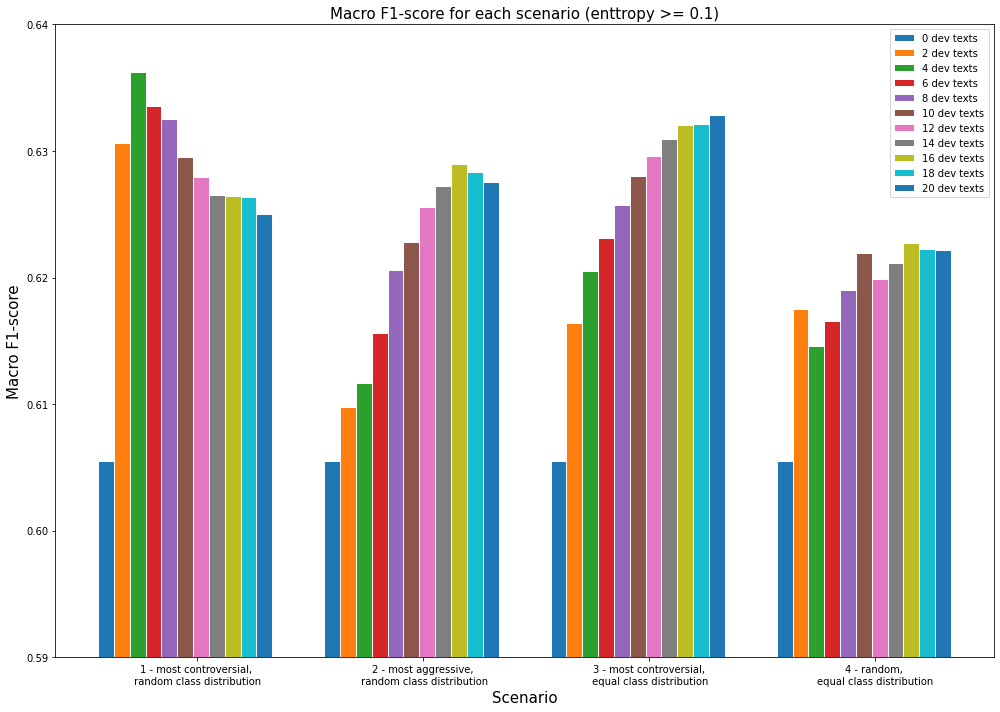

In [23]:
# macro f1-score for each scenario
avg_f1_scores_s_1 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_2 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_3 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_4 = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    avg_f1_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    avg_f1_scores_s_2[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    avg_f1_scores_s_3[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    avg_f1_scores_s_4[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()

width = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(1, 21, 5)

avg_f1_scores = [avg_f1_scores_s_1, avg_f1_scores_s_2, avg_f1_scores_s_3, avg_f1_scores_s_4]

plt.bar(r1, [score[0] for score in avg_f1_scores], width=width, edgecolor='white', label='0 dev texts')
plt.bar(r1 + 0.35, [score[1] for score in avg_f1_scores], width=width, edgecolor='white', label='2 dev texts')
plt.bar(r1 + 2*0.35, [score[2] for score in avg_f1_scores], width=width, edgecolor='white', label='4 dev texts')
plt.bar(r1 + 3*0.35, [score[3] for score in avg_f1_scores], width=width, edgecolor='white', label='6 dev texts')
plt.bar(r1 + 4*0.35, [score[4] for score in avg_f1_scores], width=width, edgecolor='white', label='8 dev texts')
plt.bar(r1 + 5*0.35, [score[5] for score in avg_f1_scores], width=width, edgecolor='white', label='10 dev texts')
plt.bar(r1 + 6*0.35, [score[6] for score in avg_f1_scores], width=width, edgecolor='white', label='12 dev texts')
plt.bar(r1 + 7*0.35, [score[7] for score in avg_f1_scores], width=width, edgecolor='white', label='14 dev texts')
plt.bar(r1 + 8*0.35, [score[8] for score in avg_f1_scores], width=width, edgecolor='white', label='16 dev texts')
plt.bar(r1 + 9*0.35, [score[9] for score in avg_f1_scores], width=width, edgecolor='white', label='18 dev texts')
plt.bar(r1 + 10*0.35, [score[10] for score in avg_f1_scores], width=width, edgecolor='white', label='20 dev texts')

plt.title('Macro F1-score for each scenario (enttropy >= 0.1)', fontsize=15)
plt.xlabel("Scenario", fontsize=15)
plt.ylabel("Macro F1-score", fontsize=15)
plt.xticks(list(range(3, 21, 5)), ['1 - most controversial,\n random class distribution',
                                   '2 - most aggressive,\n random class distribution',
                                   '3 - most controversial,\n equal class distribution',
                                   '4 - random, \nequal class distribution'])
plt.ylim(0.59, 0.64)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)


fig.tight_layout()
# plt.gcf().subplots_adjust(bottom=0.30)
# plt.savefig("macro_f1_each_scenario.png", dpi=300)

plt.show()

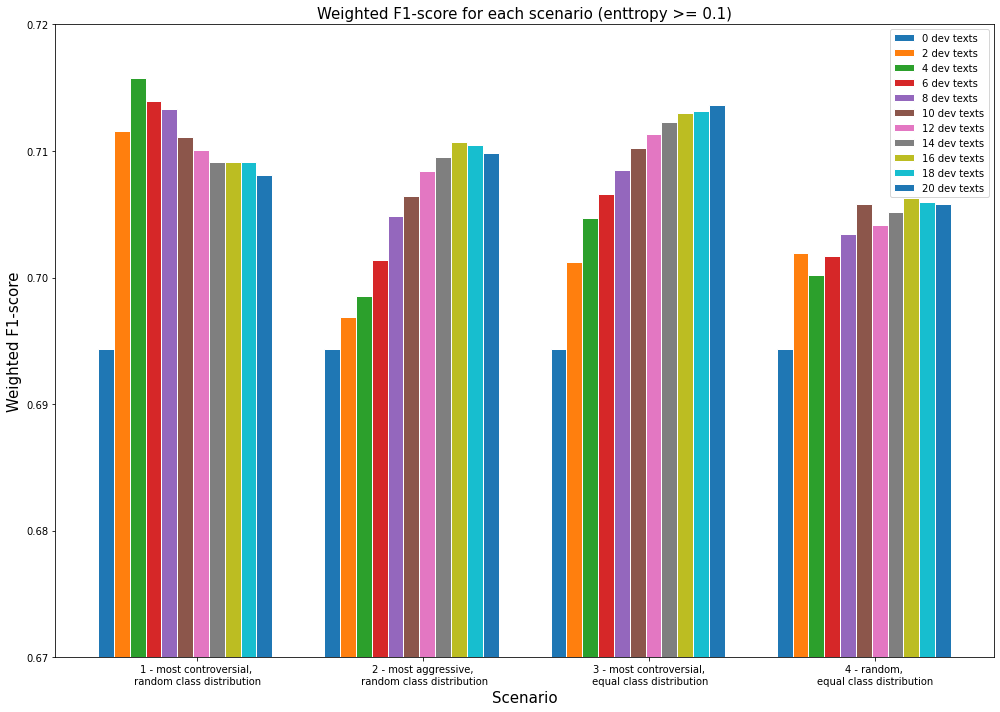

In [28]:
# weighted f1-score for each scenario
avg_f1_scores_s_1 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_2 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_3 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_4 = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    avg_f1_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    avg_f1_scores_s_2[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    avg_f1_scores_s_3[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    avg_f1_scores_s_4[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()

width = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(1, 21, 5)

avg_f1_scores = [avg_f1_scores_s_1, avg_f1_scores_s_2, avg_f1_scores_s_3, avg_f1_scores_s_4]

plt.bar(r1, [score[0] for score in avg_f1_scores], width=width, edgecolor='white', label='0 dev texts')
plt.bar(r1 + 0.35, [score[1] for score in avg_f1_scores], width=width, edgecolor='white', label='2 dev texts')
plt.bar(r1 + 2*0.35, [score[2] for score in avg_f1_scores], width=width, edgecolor='white', label='4 dev texts')
plt.bar(r1 + 3*0.35, [score[3] for score in avg_f1_scores], width=width, edgecolor='white', label='6 dev texts')
plt.bar(r1 + 4*0.35, [score[4] for score in avg_f1_scores], width=width, edgecolor='white', label='8 dev texts')
plt.bar(r1 + 5*0.35, [score[5] for score in avg_f1_scores], width=width, edgecolor='white', label='10 dev texts')
plt.bar(r1 + 6*0.35, [score[6] for score in avg_f1_scores], width=width, edgecolor='white', label='12 dev texts')
plt.bar(r1 + 7*0.35, [score[7] for score in avg_f1_scores], width=width, edgecolor='white', label='14 dev texts')
plt.bar(r1 + 8*0.35, [score[8] for score in avg_f1_scores], width=width, edgecolor='white', label='16 dev texts')
plt.bar(r1 + 9*0.35, [score[9] for score in avg_f1_scores], width=width, edgecolor='white', label='18 dev texts')
plt.bar(r1 + 10*0.35, [score[10] for score in avg_f1_scores], width=width, edgecolor='white', label='20 dev texts')

plt.title('Weighted F1-score for each scenario (enttropy >= 0.1)', fontsize=15)
plt.xlabel("Scenario", fontsize=15)
plt.ylabel("Weighted F1-score", fontsize=15)
plt.xticks(list(range(3, 21, 5)), ['1 - most controversial,\n random class distribution',
                                   '2 - most aggressive,\n random class distribution',
                                   '3 - most controversial,\n equal class distribution',
                                   '4 - random, \nequal class distribution'])
plt.ylim(0.67, 0.72)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)


fig.tight_layout()

plt.show()

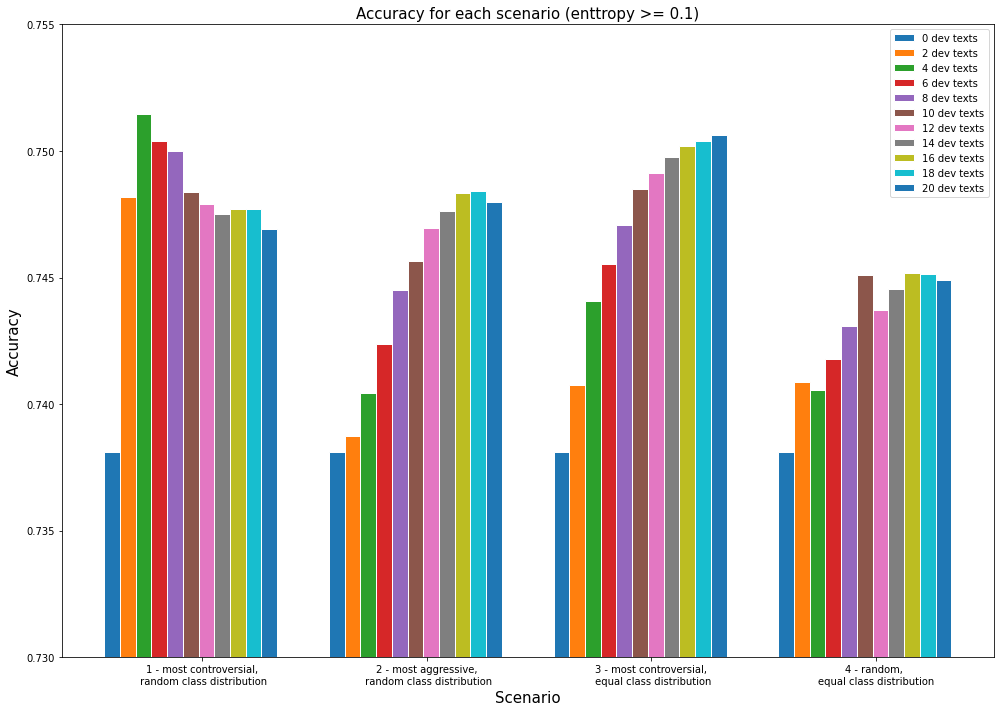

In [32]:
# accuracy for each scenario
accuracy_scores_s_1 = np.empty(11, dtype=np.float32)
accuracy_scores_s_2 = np.empty(11, dtype=np.float32)
accuracy_scores_s_3 = np.empty(11, dtype=np.float32)
accuracy_scores_s_4 = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    accuracy_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    accuracy_scores_s_2[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    accuracy_scores_s_3[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    accuracy_scores_s_4[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['accuracy'].mean()

width = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(1, 21, 5)

accuracy_scores = [accuracy_scores_s_1, accuracy_scores_s_2, accuracy_scores_s_3, accuracy_scores_s_4]

plt.bar(r1, [score[0] for score in accuracy_scores], width=width, edgecolor='white', label='0 dev texts')
plt.bar(r1 + 0.35, [score[1] for score in accuracy_scores], width=width, edgecolor='white', label='2 dev texts')
plt.bar(r1 + 2*0.35, [score[2] for score in accuracy_scores], width=width, edgecolor='white', label='4 dev texts')
plt.bar(r1 + 3*0.35, [score[3] for score in accuracy_scores], width=width, edgecolor='white', label='6 dev texts')
plt.bar(r1 + 4*0.35, [score[4] for score in accuracy_scores], width=width, edgecolor='white', label='8 dev texts')
plt.bar(r1 + 5*0.35, [score[5] for score in accuracy_scores], width=width, edgecolor='white', label='10 dev texts')
plt.bar(r1 + 6*0.35, [score[6] for score in accuracy_scores], width=width, edgecolor='white', label='12 dev texts')
plt.bar(r1 + 7*0.35, [score[7] for score in accuracy_scores], width=width, edgecolor='white', label='14 dev texts')
plt.bar(r1 + 8*0.35, [score[8] for score in accuracy_scores], width=width, edgecolor='white', label='16 dev texts')
plt.bar(r1 + 9*0.35, [score[9] for score in accuracy_scores], width=width, edgecolor='white', label='18 dev texts')
plt.bar(r1 + 10*0.35, [score[10] for score in accuracy_scores], width=width, edgecolor='white', label='20 dev texts')

plt.title('Accuracy for each scenario (enttropy >= 0.1)', fontsize=15)
plt.xlabel("Scenario", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xticks(list(range(3, 21, 5)), ['1 - most controversial,\n random class distribution',
                                   '2 - most aggressive,\n random class distribution',
                                   '3 - most controversial,\n equal class distribution',
                                   '4 - random, \nequal class distribution'])
plt.ylim(0.73, 0.755)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)


fig.tight_layout()

plt.show()

<h3>Results on 0%-20% most controversial texts</h3>

In [2]:
def get_scenario_results():
    result_df = pd.DataFrame()
    for scenario_number in [1, 2, 3, 4]:
        for dev_texts in [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]:

            for fold in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:

                with open(f'../data/partly_controversial_results/0_20/scenario_{scenario_number}/controversial_0_20_results_{scenario_number}_{dev_texts}_{fold}.pkl', 'rb') as f:
                    data = pkl.load(f)

                result_df = result_df.append({'scenario': scenario_number,
                                              'dev_texts': dev_texts,
                                              'fold': fold,
                                              '0_precision': data['0']['precision'],
                                              '0_recall': data['0']['recall'],
                                              '0_f1-score': data['0']['f1-score'],
                                              '0_support': data['0']['support'],
                                              '1_precision': data['1']['precision'],
                                              '1_recall': data['1']['recall'],
                                              '1_f1-score': data['1']['f1-score'],
                                              '1_support': data['1']['support'],
                                              'accuracy': data['accuracy'],
                                              'macro_avg_precision': data['macro avg']['precision'],
                                              'macro_avg_recall': data['macro avg']['recall'],
                                              'macro_avg_f1-score': data['macro avg']['f1-score'],
                                              'macro_avg_support': data['macro avg']['support'],
                                              'weighted_avg_precision': data['weighted avg']['precision'],
                                              'weighted_avg_recall': data['weighted avg']['recall'],
                                              'weighted_avg_f1-score': data['weighted avg']['f1-score'],
                                              'weighted_avg_support': data['weighted avg']['support']}, 
                                             ignore_index=True)
            
    return result_df

In [3]:
df = get_scenario_results()
df

,0_f1-score,0_precision,0_recall,0_support,1_f1-score,1_precision,1_recall,1_support,accuracy,dev_texts,fold,macro_avg_f1-score,macro_avg_precision,macro_avg_recall,macro_avg_support,scenario,weighted_avg_f1-score,weighted_avg_precision,weighted_avg_recall,weighted_avg_support
0,0.636426,0.499461,0.876894,1584.0,0.212407,0.523227,0.133250,1606.0,0.502508,0.0,1.0,0.424417,0.511344,0.505072,3190.0,1.0,0.422954,0.511426,0.502508,3190.0
1,0.664600,0.533215,0.881904,1702.0,0.217054,0.510949,0.137795,1524.0,0.530378,0.0,2.0,0.440827,0.522082,0.509849,3226.0,1.0,0.453174,0.522696,0.530378,3226.0
2,0.667676,0.537443,0.881211,1751.0,0.215526,0.503580,0.137102,1539.0,0.533131,0.0,3.0,0.441601,0.520512,0.509156,3290.0,1.0,0.456169,0.521603,0.533131,3290.0
3,0.657884,0.520161,0.894798,1730.0,0.225962,0.563549,0.141311,1663.0,0.525494,0.0,4.0,0.441923,0.541855,0.518054,3393.0,1.0,0.446187,0.541427,0.525494,3393.0
4,0.680861,0.552163,0.887785,1711.0,0.216722,0.506427,0.137859,1429.0,0.546497,0.0,5.0,0.448791,0.529295,0.512822,3140.0,1.0,0.469633,0.531349,0.546497,3140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0.657637,0.524004,0.882759,1595.0,0.249744,0.566125,0.160210,1523.0,0.529827,20.0,6.0,0.453690,0.545065,0.521484,3118.0,4.0,0.458400,0.544579,0.529827,3118.0
436,0.664771,0.537482,0.871060,1745.0,0.251830,0.534161,0.164751,1566.0,0.536998,20.0,7.0,0.458301,0.535822,0.517906,3311.0,4.0,0.469463,0.535912,0.536998,3311.0
437,0.682651,0.553965,0.889216,1697.0,0.265060,0.573696,0.172343,1468.0,0.556714,20.0,8.0,0.473856,0.563830,0.530780,3165.0,4.0,0.488963,0.563117,0.556714,3165.0
438,0.685133,0.559562,0.883371,1792.0,0.284309,0.580321,0.188274,1535.0,0.562669,20.0,9.0,0.484721,0.569941,0.535822,3327.0,4.0,0.500202,0.569140,0.562669,3327.0


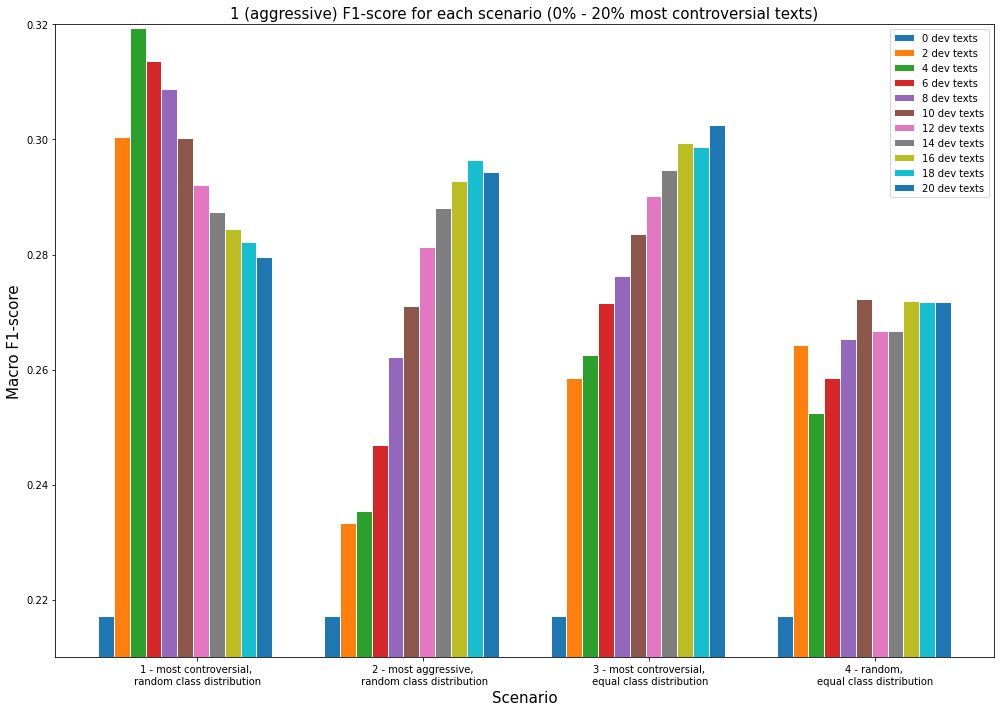

In [14]:
# macro f1-score for each scenario
avg_f1_scores_s_1 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_2 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_3 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_4 = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    avg_f1_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['1_f1-score'].mean()
    avg_f1_scores_s_2[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['1_f1-score'].mean()
    avg_f1_scores_s_3[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['1_f1-score'].mean()
    avg_f1_scores_s_4[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['1_f1-score'].mean()

width = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(1, 21, 5)

avg_f1_scores = [avg_f1_scores_s_1, avg_f1_scores_s_2, avg_f1_scores_s_3, avg_f1_scores_s_4]

plt.bar(r1, [score[0] for score in avg_f1_scores], width=width, edgecolor='white', label='0 dev texts')
plt.bar(r1 + 0.35, [score[1] for score in avg_f1_scores], width=width, edgecolor='white', label='2 dev texts')
plt.bar(r1 + 2*0.35, [score[2] for score in avg_f1_scores], width=width, edgecolor='white', label='4 dev texts')
plt.bar(r1 + 3*0.35, [score[3] for score in avg_f1_scores], width=width, edgecolor='white', label='6 dev texts')
plt.bar(r1 + 4*0.35, [score[4] for score in avg_f1_scores], width=width, edgecolor='white', label='8 dev texts')
plt.bar(r1 + 5*0.35, [score[5] for score in avg_f1_scores], width=width, edgecolor='white', label='10 dev texts')
plt.bar(r1 + 6*0.35, [score[6] for score in avg_f1_scores], width=width, edgecolor='white', label='12 dev texts')
plt.bar(r1 + 7*0.35, [score[7] for score in avg_f1_scores], width=width, edgecolor='white', label='14 dev texts')
plt.bar(r1 + 8*0.35, [score[8] for score in avg_f1_scores], width=width, edgecolor='white', label='16 dev texts')
plt.bar(r1 + 9*0.35, [score[9] for score in avg_f1_scores], width=width, edgecolor='white', label='18 dev texts')
plt.bar(r1 + 10*0.35, [score[10] for score in avg_f1_scores], width=width, edgecolor='white', label='20 dev texts')

plt.title('1 (aggressive) F1-score for each scenario (0% - 20% most controversial texts)', fontsize=15)
plt.xlabel("Scenario", fontsize=15)
plt.ylabel("Macro F1-score", fontsize=15)
plt.xticks(list(range(3, 21, 5)), ['1 - most controversial,\n random class distribution',
                                   '2 - most aggressive,\n random class distribution',
                                   '3 - most controversial,\n equal class distribution',
                                   '4 - random, \nequal class distribution'])
plt.ylim(0.21, 0.32)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)


fig.tight_layout()
# plt.gcf().subplots_adjust(bottom=0.30)
# plt.savefig("macro_f1_each_scenario.png", dpi=300)

plt.show()

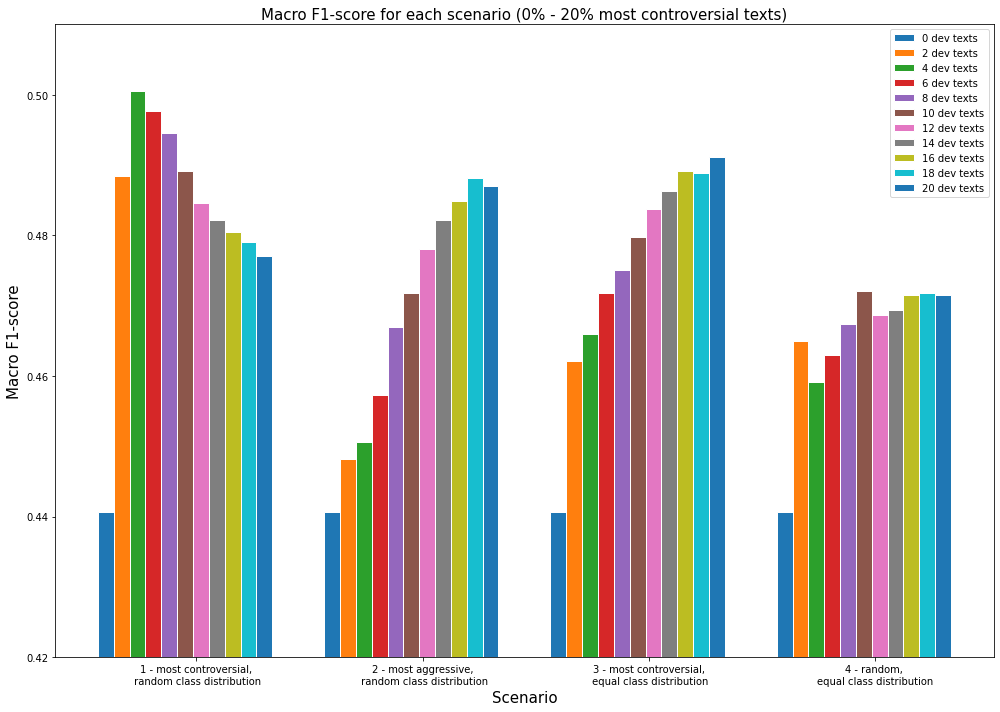

In [43]:
# macro f1-score for each scenario
avg_f1_scores_s_1 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_2 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_3 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_4 = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    avg_f1_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    avg_f1_scores_s_2[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    avg_f1_scores_s_3[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    avg_f1_scores_s_4[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()

width = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(1, 21, 5)

avg_f1_scores = [avg_f1_scores_s_1, avg_f1_scores_s_2, avg_f1_scores_s_3, avg_f1_scores_s_4]

plt.bar(r1, [score[0] for score in avg_f1_scores], width=width, edgecolor='white', label='0 dev texts')
plt.bar(r1 + 0.35, [score[1] for score in avg_f1_scores], width=width, edgecolor='white', label='2 dev texts')
plt.bar(r1 + 2*0.35, [score[2] for score in avg_f1_scores], width=width, edgecolor='white', label='4 dev texts')
plt.bar(r1 + 3*0.35, [score[3] for score in avg_f1_scores], width=width, edgecolor='white', label='6 dev texts')
plt.bar(r1 + 4*0.35, [score[4] for score in avg_f1_scores], width=width, edgecolor='white', label='8 dev texts')
plt.bar(r1 + 5*0.35, [score[5] for score in avg_f1_scores], width=width, edgecolor='white', label='10 dev texts')
plt.bar(r1 + 6*0.35, [score[6] for score in avg_f1_scores], width=width, edgecolor='white', label='12 dev texts')
plt.bar(r1 + 7*0.35, [score[7] for score in avg_f1_scores], width=width, edgecolor='white', label='14 dev texts')
plt.bar(r1 + 8*0.35, [score[8] for score in avg_f1_scores], width=width, edgecolor='white', label='16 dev texts')
plt.bar(r1 + 9*0.35, [score[9] for score in avg_f1_scores], width=width, edgecolor='white', label='18 dev texts')
plt.bar(r1 + 10*0.35, [score[10] for score in avg_f1_scores], width=width, edgecolor='white', label='20 dev texts')

plt.title('Macro F1-score for each scenario (0% - 20% most controversial texts)', fontsize=15)
plt.xlabel("Scenario", fontsize=15)
plt.ylabel("Macro F1-score", fontsize=15)
plt.xticks(list(range(3, 21, 5)), ['1 - most controversial,\n random class distribution',
                                   '2 - most aggressive,\n random class distribution',
                                   '3 - most controversial,\n equal class distribution',
                                   '4 - random, \nequal class distribution'])
plt.ylim(0.42, 0.51)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)


fig.tight_layout()
# plt.gcf().subplots_adjust(bottom=0.30)
# plt.savefig("macro_f1_each_scenario.png", dpi=300)

plt.show()

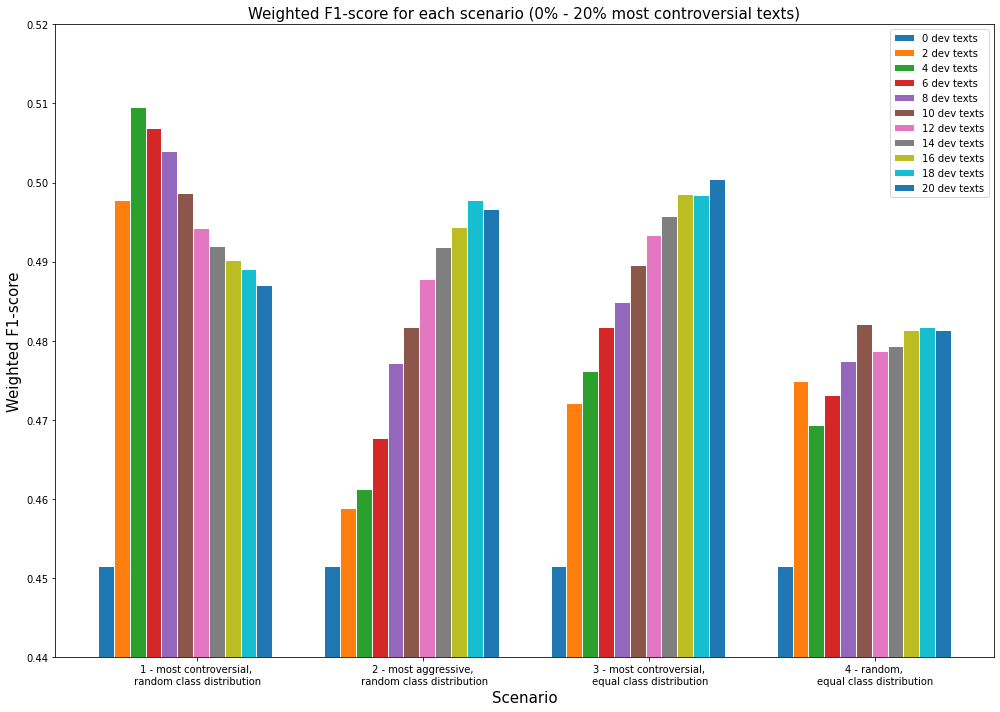

In [50]:
# weighted f1-score for each scenario
avg_f1_scores_s_1 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_2 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_3 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_4 = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    avg_f1_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    avg_f1_scores_s_2[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    avg_f1_scores_s_3[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    avg_f1_scores_s_4[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()

width = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(1, 21, 5)

avg_f1_scores = [avg_f1_scores_s_1, avg_f1_scores_s_2, avg_f1_scores_s_3, avg_f1_scores_s_4]

plt.bar(r1, [score[0] for score in avg_f1_scores], width=width, edgecolor='white', label='0 dev texts')
plt.bar(r1 + 0.35, [score[1] for score in avg_f1_scores], width=width, edgecolor='white', label='2 dev texts')
plt.bar(r1 + 2*0.35, [score[2] for score in avg_f1_scores], width=width, edgecolor='white', label='4 dev texts')
plt.bar(r1 + 3*0.35, [score[3] for score in avg_f1_scores], width=width, edgecolor='white', label='6 dev texts')
plt.bar(r1 + 4*0.35, [score[4] for score in avg_f1_scores], width=width, edgecolor='white', label='8 dev texts')
plt.bar(r1 + 5*0.35, [score[5] for score in avg_f1_scores], width=width, edgecolor='white', label='10 dev texts')
plt.bar(r1 + 6*0.35, [score[6] for score in avg_f1_scores], width=width, edgecolor='white', label='12 dev texts')
plt.bar(r1 + 7*0.35, [score[7] for score in avg_f1_scores], width=width, edgecolor='white', label='14 dev texts')
plt.bar(r1 + 8*0.35, [score[8] for score in avg_f1_scores], width=width, edgecolor='white', label='16 dev texts')
plt.bar(r1 + 9*0.35, [score[9] for score in avg_f1_scores], width=width, edgecolor='white', label='18 dev texts')
plt.bar(r1 + 10*0.35, [score[10] for score in avg_f1_scores], width=width, edgecolor='white', label='20 dev texts')

plt.title('Weighted F1-score for each scenario (0% - 20% most controversial texts)', fontsize=15)
plt.xlabel("Scenario", fontsize=15)
plt.ylabel("Weighted F1-score", fontsize=15)
plt.xticks(list(range(3, 21, 5)), ['1 - most controversial,\n random class distribution',
                                   '2 - most aggressive,\n random class distribution',
                                   '3 - most controversial,\n equal class distribution',
                                   '4 - random, \nequal class distribution'])
plt.ylim(0.44, 0.52)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)


fig.tight_layout()

plt.show()

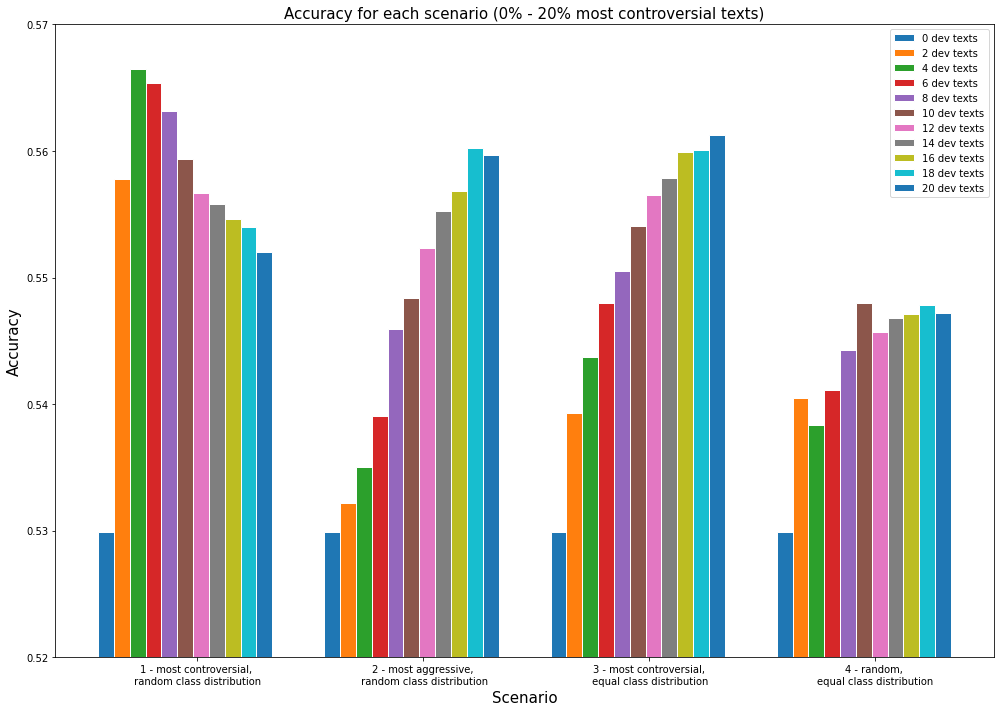

In [53]:
# accuracy for each scenario
accuracy_scores_s_1 = np.empty(11, dtype=np.float32)
accuracy_scores_s_2 = np.empty(11, dtype=np.float32)
accuracy_scores_s_3 = np.empty(11, dtype=np.float32)
accuracy_scores_s_4 = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    accuracy_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    accuracy_scores_s_2[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    accuracy_scores_s_3[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    accuracy_scores_s_4[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['accuracy'].mean()

width = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(1, 21, 5)

accuracy_scores = [accuracy_scores_s_1, accuracy_scores_s_2, accuracy_scores_s_3, accuracy_scores_s_4]

plt.bar(r1, [score[0] for score in accuracy_scores], width=width, edgecolor='white', label='0 dev texts')
plt.bar(r1 + 0.35, [score[1] for score in accuracy_scores], width=width, edgecolor='white', label='2 dev texts')
plt.bar(r1 + 2*0.35, [score[2] for score in accuracy_scores], width=width, edgecolor='white', label='4 dev texts')
plt.bar(r1 + 3*0.35, [score[3] for score in accuracy_scores], width=width, edgecolor='white', label='6 dev texts')
plt.bar(r1 + 4*0.35, [score[4] for score in accuracy_scores], width=width, edgecolor='white', label='8 dev texts')
plt.bar(r1 + 5*0.35, [score[5] for score in accuracy_scores], width=width, edgecolor='white', label='10 dev texts')
plt.bar(r1 + 6*0.35, [score[6] for score in accuracy_scores], width=width, edgecolor='white', label='12 dev texts')
plt.bar(r1 + 7*0.35, [score[7] for score in accuracy_scores], width=width, edgecolor='white', label='14 dev texts')
plt.bar(r1 + 8*0.35, [score[8] for score in accuracy_scores], width=width, edgecolor='white', label='16 dev texts')
plt.bar(r1 + 9*0.35, [score[9] for score in accuracy_scores], width=width, edgecolor='white', label='18 dev texts')
plt.bar(r1 + 10*0.35, [score[10] for score in accuracy_scores], width=width, edgecolor='white', label='20 dev texts')

plt.title('Accuracy for each scenario (0% - 20% most controversial texts)', fontsize=15)
plt.xlabel("Scenario", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xticks(list(range(3, 21, 5)), ['1 - most controversial,\n random class distribution',
                                   '2 - most aggressive,\n random class distribution',
                                   '3 - most controversial,\n equal class distribution',
                                   '4 - random, \nequal class distribution'])
plt.ylim(0.52, 0.57)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)


fig.tight_layout()

plt.show()

<h3>Results on 20%-40% most controversial texts</h3>

In [54]:
def get_scenario_results():
    result_df = pd.DataFrame()
    for scenario_number in [1, 2, 3, 4]:
        for dev_texts in [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]:

            for fold in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:

                with open(f'../data/partly_controversial_results/20_40/scenario_{scenario_number}/controversial_20_40_results_{scenario_number}_{dev_texts}_{fold}.pkl', 'rb') as f:
                    data = pkl.load(f)

                result_df = result_df.append({'scenario': scenario_number,
                                              'dev_texts': dev_texts,
                                              'fold': fold,
                                              '0_precision': data['0']['precision'],
                                              '0_recall': data['0']['recall'],
                                              '0_f1-score': data['0']['f1-score'],
                                              '0_support': data['0']['support'],
                                              '1_precision': data['1']['precision'],
                                              '1_recall': data['1']['recall'],
                                              '1_f1-score': data['1']['f1-score'],
                                              '1_support': data['1']['support'],
                                              'accuracy': data['accuracy'],
                                              'macro_avg_precision': data['macro avg']['precision'],
                                              'macro_avg_recall': data['macro avg']['recall'],
                                              'macro_avg_f1-score': data['macro avg']['f1-score'],
                                              'macro_avg_support': data['macro avg']['support'],
                                              'weighted_avg_precision': data['weighted avg']['precision'],
                                              'weighted_avg_recall': data['weighted avg']['recall'],
                                              'weighted_avg_f1-score': data['weighted avg']['f1-score'],
                                              'weighted_avg_support': data['weighted avg']['support']}, 
                                             ignore_index=True)
            
    return result_df

In [55]:
df = get_scenario_results()
df

,0_f1-score,0_precision,0_recall,0_support,1_f1-score,1_precision,1_recall,1_support,accuracy,dev_texts,fold,macro_avg_f1-score,macro_avg_precision,macro_avg_recall,macro_avg_support,scenario,weighted_avg_f1-score,weighted_avg_precision,weighted_avg_recall,weighted_avg_support
0,0.742039,0.618674,0.926855,1873.0,0.290417,0.643229,0.187547,1317.0,0.621630,0.0,1.0,0.516228,0.630952,0.557201,3190.0,1.0,0.555586,0.628812,0.621630,3190.0
1,0.761725,0.648716,0.922414,1972.0,0.321002,0.637441,0.214514,1254.0,0.647241,0.0,2.0,0.541364,0.643078,0.568464,3226.0,1.0,0.590409,0.644333,0.647241,3226.0
2,0.762743,0.646650,0.929641,2004.0,0.316224,0.655257,0.208398,1286.0,0.647720,0.0,3.0,0.539484,0.650954,0.569019,3290.0,1.0,0.588207,0.650014,0.647720,3290.0
3,0.754410,0.639664,0.919324,2070.0,0.288340,0.600478,0.189720,1323.0,0.634836,0.0,4.0,0.521375,0.620071,0.554522,3393.0,1.0,0.572680,0.624385,0.634836,3393.0
4,0.779633,0.675832,0.921105,2028.0,0.290323,0.574468,0.194245,1112.0,0.663694,0.0,5.0,0.534978,0.625150,0.557675,3140.0,1.0,0.606348,0.639935,0.663694,3140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0.770658,0.659041,0.927792,1925.0,0.336040,0.659314,0.225482,1193.0,0.659076,20.0,6.0,0.553349,0.659177,0.576637,3118.0,4.0,0.604366,0.659145,0.659076,3118.0
436,0.763412,0.652724,0.919307,2020.0,0.344906,0.650215,0.234702,1291.0,0.652371,20.0,7.0,0.554159,0.651469,0.577004,3311.0,4.0,0.600231,0.651746,0.652371,3311.0
437,0.775847,0.665576,0.929914,1969.0,0.342857,0.666667,0.230769,1196.0,0.665719,20.0,8.0,0.559352,0.666121,0.580341,3165.0,4.0,0.612228,0.665988,0.665719,3165.0
438,0.772095,0.665374,0.919591,2052.0,0.369196,0.663951,0.255686,1275.0,0.665164,20.0,9.0,0.570645,0.664662,0.587638,3327.0,4.0,0.617693,0.664829,0.665164,3327.0


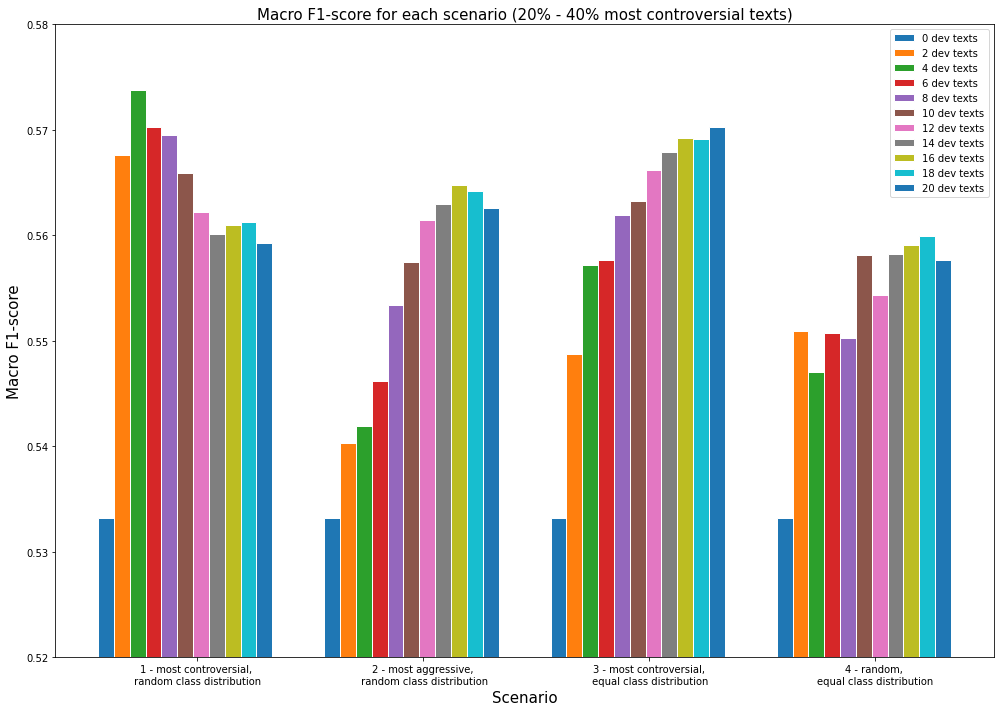

In [62]:
# macro f1-score for each scenario
avg_f1_scores_s_1 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_2 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_3 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_4 = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    avg_f1_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    avg_f1_scores_s_2[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    avg_f1_scores_s_3[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    avg_f1_scores_s_4[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()

width = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(1, 21, 5)

avg_f1_scores = [avg_f1_scores_s_1, avg_f1_scores_s_2, avg_f1_scores_s_3, avg_f1_scores_s_4]

plt.bar(r1, [score[0] for score in avg_f1_scores], width=width, edgecolor='white', label='0 dev texts')
plt.bar(r1 + 0.35, [score[1] for score in avg_f1_scores], width=width, edgecolor='white', label='2 dev texts')
plt.bar(r1 + 2*0.35, [score[2] for score in avg_f1_scores], width=width, edgecolor='white', label='4 dev texts')
plt.bar(r1 + 3*0.35, [score[3] for score in avg_f1_scores], width=width, edgecolor='white', label='6 dev texts')
plt.bar(r1 + 4*0.35, [score[4] for score in avg_f1_scores], width=width, edgecolor='white', label='8 dev texts')
plt.bar(r1 + 5*0.35, [score[5] for score in avg_f1_scores], width=width, edgecolor='white', label='10 dev texts')
plt.bar(r1 + 6*0.35, [score[6] for score in avg_f1_scores], width=width, edgecolor='white', label='12 dev texts')
plt.bar(r1 + 7*0.35, [score[7] for score in avg_f1_scores], width=width, edgecolor='white', label='14 dev texts')
plt.bar(r1 + 8*0.35, [score[8] for score in avg_f1_scores], width=width, edgecolor='white', label='16 dev texts')
plt.bar(r1 + 9*0.35, [score[9] for score in avg_f1_scores], width=width, edgecolor='white', label='18 dev texts')
plt.bar(r1 + 10*0.35, [score[10] for score in avg_f1_scores], width=width, edgecolor='white', label='20 dev texts')

plt.title('Macro F1-score for each scenario (20% - 40% most controversial texts)', fontsize=15)
plt.xlabel("Scenario", fontsize=15)
plt.ylabel("Macro F1-score", fontsize=15)
plt.xticks(list(range(3, 21, 5)), ['1 - most controversial,\n random class distribution',
                                   '2 - most aggressive,\n random class distribution',
                                   '3 - most controversial,\n equal class distribution',
                                   '4 - random, \nequal class distribution'])
plt.ylim(0.52, 0.58)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)


fig.tight_layout()
# plt.gcf().subplots_adjust(bottom=0.30)
# plt.savefig("macro_f1_each_scenario.png", dpi=300)

plt.show()

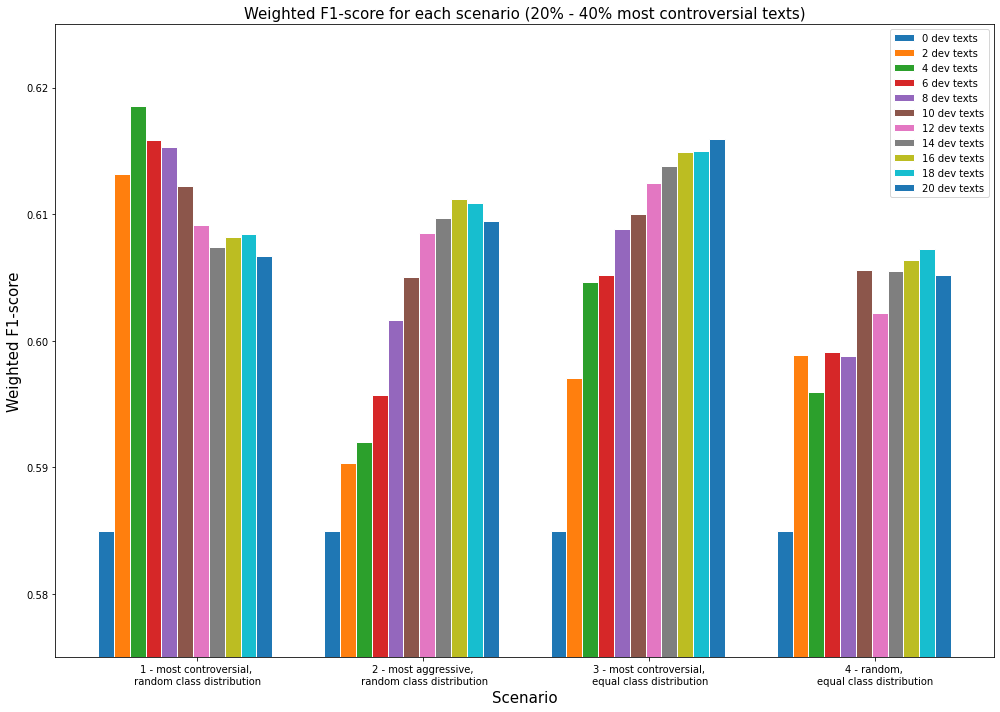

In [69]:
# weighted f1-score for each scenario
avg_f1_scores_s_1 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_2 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_3 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_4 = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    avg_f1_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    avg_f1_scores_s_2[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    avg_f1_scores_s_3[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    avg_f1_scores_s_4[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()

width = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(1, 21, 5)

avg_f1_scores = [avg_f1_scores_s_1, avg_f1_scores_s_2, avg_f1_scores_s_3, avg_f1_scores_s_4]

plt.bar(r1, [score[0] for score in avg_f1_scores], width=width, edgecolor='white', label='0 dev texts')
plt.bar(r1 + 0.35, [score[1] for score in avg_f1_scores], width=width, edgecolor='white', label='2 dev texts')
plt.bar(r1 + 2*0.35, [score[2] for score in avg_f1_scores], width=width, edgecolor='white', label='4 dev texts')
plt.bar(r1 + 3*0.35, [score[3] for score in avg_f1_scores], width=width, edgecolor='white', label='6 dev texts')
plt.bar(r1 + 4*0.35, [score[4] for score in avg_f1_scores], width=width, edgecolor='white', label='8 dev texts')
plt.bar(r1 + 5*0.35, [score[5] for score in avg_f1_scores], width=width, edgecolor='white', label='10 dev texts')
plt.bar(r1 + 6*0.35, [score[6] for score in avg_f1_scores], width=width, edgecolor='white', label='12 dev texts')
plt.bar(r1 + 7*0.35, [score[7] for score in avg_f1_scores], width=width, edgecolor='white', label='14 dev texts')
plt.bar(r1 + 8*0.35, [score[8] for score in avg_f1_scores], width=width, edgecolor='white', label='16 dev texts')
plt.bar(r1 + 9*0.35, [score[9] for score in avg_f1_scores], width=width, edgecolor='white', label='18 dev texts')
plt.bar(r1 + 10*0.35, [score[10] for score in avg_f1_scores], width=width, edgecolor='white', label='20 dev texts')

plt.title('Weighted F1-score for each scenario (20% - 40% most controversial texts)', fontsize=15)
plt.xlabel("Scenario", fontsize=15)
plt.ylabel("Weighted F1-score", fontsize=15)
plt.xticks(list(range(3, 21, 5)), ['1 - most controversial,\n random class distribution',
                                   '2 - most aggressive,\n random class distribution',
                                   '3 - most controversial,\n equal class distribution',
                                   '4 - random, \nequal class distribution'])
plt.ylim(0.575, 0.625)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)


fig.tight_layout()

plt.show()

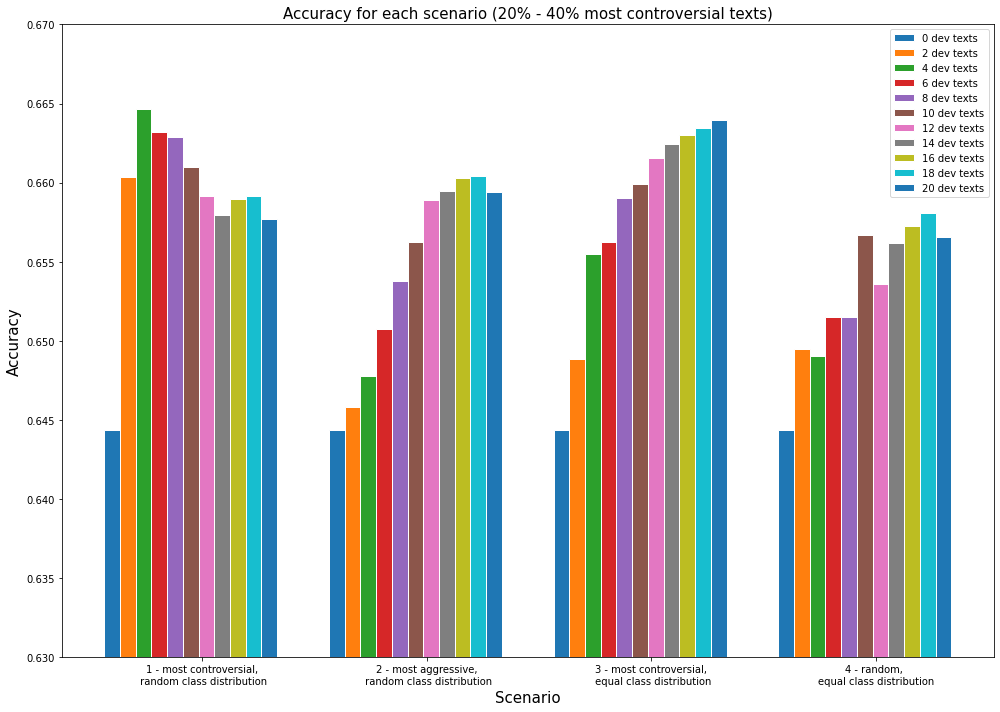

In [72]:
# accuracy for each scenario
accuracy_scores_s_1 = np.empty(11, dtype=np.float32)
accuracy_scores_s_2 = np.empty(11, dtype=np.float32)
accuracy_scores_s_3 = np.empty(11, dtype=np.float32)
accuracy_scores_s_4 = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    accuracy_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    accuracy_scores_s_2[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    accuracy_scores_s_3[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    accuracy_scores_s_4[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['accuracy'].mean()

width = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(1, 21, 5)

accuracy_scores = [accuracy_scores_s_1, accuracy_scores_s_2, accuracy_scores_s_3, accuracy_scores_s_4]

plt.bar(r1, [score[0] for score in accuracy_scores], width=width, edgecolor='white', label='0 dev texts')
plt.bar(r1 + 0.35, [score[1] for score in accuracy_scores], width=width, edgecolor='white', label='2 dev texts')
plt.bar(r1 + 2*0.35, [score[2] for score in accuracy_scores], width=width, edgecolor='white', label='4 dev texts')
plt.bar(r1 + 3*0.35, [score[3] for score in accuracy_scores], width=width, edgecolor='white', label='6 dev texts')
plt.bar(r1 + 4*0.35, [score[4] for score in accuracy_scores], width=width, edgecolor='white', label='8 dev texts')
plt.bar(r1 + 5*0.35, [score[5] for score in accuracy_scores], width=width, edgecolor='white', label='10 dev texts')
plt.bar(r1 + 6*0.35, [score[6] for score in accuracy_scores], width=width, edgecolor='white', label='12 dev texts')
plt.bar(r1 + 7*0.35, [score[7] for score in accuracy_scores], width=width, edgecolor='white', label='14 dev texts')
plt.bar(r1 + 8*0.35, [score[8] for score in accuracy_scores], width=width, edgecolor='white', label='16 dev texts')
plt.bar(r1 + 9*0.35, [score[9] for score in accuracy_scores], width=width, edgecolor='white', label='18 dev texts')
plt.bar(r1 + 10*0.35, [score[10] for score in accuracy_scores], width=width, edgecolor='white', label='20 dev texts')

plt.title('Accuracy for each scenario (20% - 40% most controversial texts)', fontsize=15)
plt.xlabel("Scenario", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xticks(list(range(3, 21, 5)), ['1 - most controversial,\n random class distribution',
                                   '2 - most aggressive,\n random class distribution',
                                   '3 - most controversial,\n equal class distribution',
                                   '4 - random, \nequal class distribution'])
plt.ylim(0.63, 0.67)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)


fig.tight_layout()

plt.show()

<h3>Results on 40%-60% most controversial texts</h3>

In [75]:
def get_scenario_results():
    result_df = pd.DataFrame()
    for scenario_number in [1, 2, 3, 4]:
        for dev_texts in [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]:

            for fold in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:

                with open(f'../data/partly_controversial_results/40_60/scenario_{scenario_number}/controversial_40_60_results_{scenario_number}_{dev_texts}_{fold}.pkl', 'rb') as f:
                    data = pkl.load(f)

                result_df = result_df.append({'scenario': scenario_number,
                                              'dev_texts': dev_texts,
                                              'fold': fold,
                                              '0_precision': data['0']['precision'],
                                              '0_recall': data['0']['recall'],
                                              '0_f1-score': data['0']['f1-score'],
                                              '0_support': data['0']['support'],
                                              '1_precision': data['1']['precision'],
                                              '1_recall': data['1']['recall'],
                                              '1_f1-score': data['1']['f1-score'],
                                              '1_support': data['1']['support'],
                                              'accuracy': data['accuracy'],
                                              'macro_avg_precision': data['macro avg']['precision'],
                                              'macro_avg_recall': data['macro avg']['recall'],
                                              'macro_avg_f1-score': data['macro avg']['f1-score'],
                                              'macro_avg_support': data['macro avg']['support'],
                                              'weighted_avg_precision': data['weighted avg']['precision'],
                                              'weighted_avg_recall': data['weighted avg']['recall'],
                                              'weighted_avg_f1-score': data['weighted avg']['f1-score'],
                                              'weighted_avg_support': data['weighted avg']['support']}, 
                                             ignore_index=True)
            
    return result_df

In [76]:
df = get_scenario_results()
df

,0_f1-score,0_precision,0_recall,0_support,1_f1-score,1_precision,1_recall,1_support,accuracy,dev_texts,fold,macro_avg_f1-score,macro_avg_precision,macro_avg_recall,macro_avg_support,scenario,weighted_avg_f1-score,weighted_avg_precision,weighted_avg_recall,weighted_avg_support
0,0.840551,0.756824,0.945108,2259.0,0.376923,0.663957,0.263158,931.0,0.746082,0.0,1.0,0.608737,0.710390,0.604133,3190.0,1.0,0.705242,0.729721,0.746082,3190.0
1,0.852415,0.775017,0.946986,2339.0,0.388845,0.663043,0.275085,887.0,0.762244,0.0,2.0,0.620630,0.719030,0.611035,3226.0,1.0,0.724955,0.744230,0.762244,3226.0
2,0.839520,0.751992,0.950109,2285.0,0.410511,0.717122,0.287562,1005.0,0.747720,0.0,3.0,0.625016,0.734557,0.618836,3290.0,1.0,0.708471,0.741340,0.747720,3290.0
3,0.830572,0.738286,0.949225,2324.0,0.389417,0.708642,0.268475,1069.0,0.734748,0.0,4.0,0.609994,0.723464,0.608850,3393.0,1.0,0.691582,0.728947,0.734748,3393.0
4,0.869137,0.796029,0.957031,2304.0,0.449420,0.732432,0.324163,836.0,0.788535,0.0,5.0,0.659278,0.764231,0.640597,3140.0,1.0,0.757390,0.779097,0.788535,3140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0.851064,0.770629,0.950247,2231.0,0.408293,0.697548,0.288613,887.0,0.762027,20.0,6.0,0.629679,0.734088,0.619430,3118.0,4.0,0.725106,0.749839,0.762027,3118.0
436,0.842610,0.759778,0.945713,2321.0,0.419263,0.701422,0.298990,990.0,0.752341,20.0,7.0,0.630937,0.730600,0.622351,3311.0,4.0,0.716028,0.742330,0.752341,3311.0
437,0.857313,0.777818,0.954907,2262.0,0.443067,0.737113,0.316722,903.0,0.772828,20.0,8.0,0.650190,0.757466,0.635815,3165.0,4.0,0.739125,0.766204,0.772828,3165.0
438,0.853710,0.778706,0.944702,2369.0,0.456414,0.710817,0.336117,958.0,0.769462,20.0,9.0,0.655062,0.744761,0.640410,3327.0,4.0,0.739310,0.759157,0.769462,3327.0


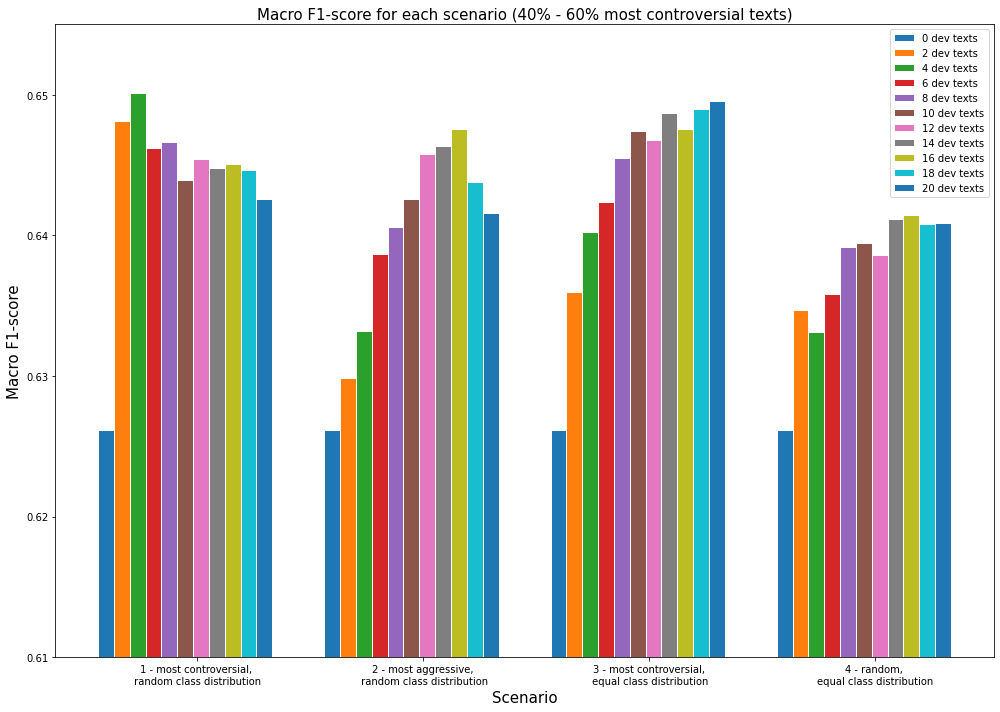

In [80]:
# macro f1-score for each scenario
avg_f1_scores_s_1 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_2 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_3 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_4 = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    avg_f1_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    avg_f1_scores_s_2[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    avg_f1_scores_s_3[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    avg_f1_scores_s_4[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()

width = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(1, 21, 5)

avg_f1_scores = [avg_f1_scores_s_1, avg_f1_scores_s_2, avg_f1_scores_s_3, avg_f1_scores_s_4]

plt.bar(r1, [score[0] for score in avg_f1_scores], width=width, edgecolor='white', label='0 dev texts')
plt.bar(r1 + 0.35, [score[1] for score in avg_f1_scores], width=width, edgecolor='white', label='2 dev texts')
plt.bar(r1 + 2*0.35, [score[2] for score in avg_f1_scores], width=width, edgecolor='white', label='4 dev texts')
plt.bar(r1 + 3*0.35, [score[3] for score in avg_f1_scores], width=width, edgecolor='white', label='6 dev texts')
plt.bar(r1 + 4*0.35, [score[4] for score in avg_f1_scores], width=width, edgecolor='white', label='8 dev texts')
plt.bar(r1 + 5*0.35, [score[5] for score in avg_f1_scores], width=width, edgecolor='white', label='10 dev texts')
plt.bar(r1 + 6*0.35, [score[6] for score in avg_f1_scores], width=width, edgecolor='white', label='12 dev texts')
plt.bar(r1 + 7*0.35, [score[7] for score in avg_f1_scores], width=width, edgecolor='white', label='14 dev texts')
plt.bar(r1 + 8*0.35, [score[8] for score in avg_f1_scores], width=width, edgecolor='white', label='16 dev texts')
plt.bar(r1 + 9*0.35, [score[9] for score in avg_f1_scores], width=width, edgecolor='white', label='18 dev texts')
plt.bar(r1 + 10*0.35, [score[10] for score in avg_f1_scores], width=width, edgecolor='white', label='20 dev texts')

plt.title('Macro F1-score for each scenario (40% - 60% most controversial texts)', fontsize=15)
plt.xlabel("Scenario", fontsize=15)
plt.ylabel("Macro F1-score", fontsize=15)
plt.xticks(list(range(3, 21, 5)), ['1 - most controversial,\n random class distribution',
                                   '2 - most aggressive,\n random class distribution',
                                   '3 - most controversial,\n equal class distribution',
                                   '4 - random, \nequal class distribution'])
plt.ylim(0.61, 0.655)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)


fig.tight_layout()
# plt.gcf().subplots_adjust(bottom=0.30)
# plt.savefig("macro_f1_each_scenario.png", dpi=300)

plt.show()

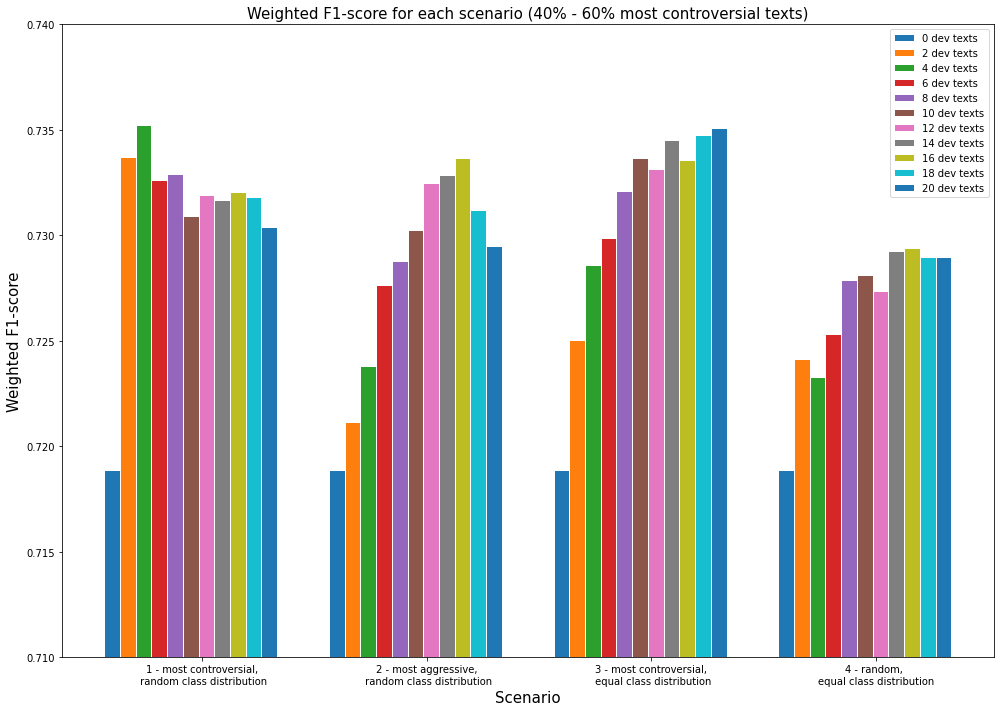

In [84]:
# weighted f1-score for each scenario
avg_f1_scores_s_1 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_2 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_3 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_4 = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    avg_f1_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    avg_f1_scores_s_2[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    avg_f1_scores_s_3[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    avg_f1_scores_s_4[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()

width = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(1, 21, 5)

avg_f1_scores = [avg_f1_scores_s_1, avg_f1_scores_s_2, avg_f1_scores_s_3, avg_f1_scores_s_4]

plt.bar(r1, [score[0] for score in avg_f1_scores], width=width, edgecolor='white', label='0 dev texts')
plt.bar(r1 + 0.35, [score[1] for score in avg_f1_scores], width=width, edgecolor='white', label='2 dev texts')
plt.bar(r1 + 2*0.35, [score[2] for score in avg_f1_scores], width=width, edgecolor='white', label='4 dev texts')
plt.bar(r1 + 3*0.35, [score[3] for score in avg_f1_scores], width=width, edgecolor='white', label='6 dev texts')
plt.bar(r1 + 4*0.35, [score[4] for score in avg_f1_scores], width=width, edgecolor='white', label='8 dev texts')
plt.bar(r1 + 5*0.35, [score[5] for score in avg_f1_scores], width=width, edgecolor='white', label='10 dev texts')
plt.bar(r1 + 6*0.35, [score[6] for score in avg_f1_scores], width=width, edgecolor='white', label='12 dev texts')
plt.bar(r1 + 7*0.35, [score[7] for score in avg_f1_scores], width=width, edgecolor='white', label='14 dev texts')
plt.bar(r1 + 8*0.35, [score[8] for score in avg_f1_scores], width=width, edgecolor='white', label='16 dev texts')
plt.bar(r1 + 9*0.35, [score[9] for score in avg_f1_scores], width=width, edgecolor='white', label='18 dev texts')
plt.bar(r1 + 10*0.35, [score[10] for score in avg_f1_scores], width=width, edgecolor='white', label='20 dev texts')

plt.title('Weighted F1-score for each scenario (40% - 60% most controversial texts)', fontsize=15)
plt.xlabel("Scenario", fontsize=15)
plt.ylabel("Weighted F1-score", fontsize=15)
plt.xticks(list(range(3, 21, 5)), ['1 - most controversial,\n random class distribution',
                                   '2 - most aggressive,\n random class distribution',
                                   '3 - most controversial,\n equal class distribution',
                                   '4 - random, \nequal class distribution'])
plt.ylim(0.71, 0.74)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)


fig.tight_layout()

plt.show()

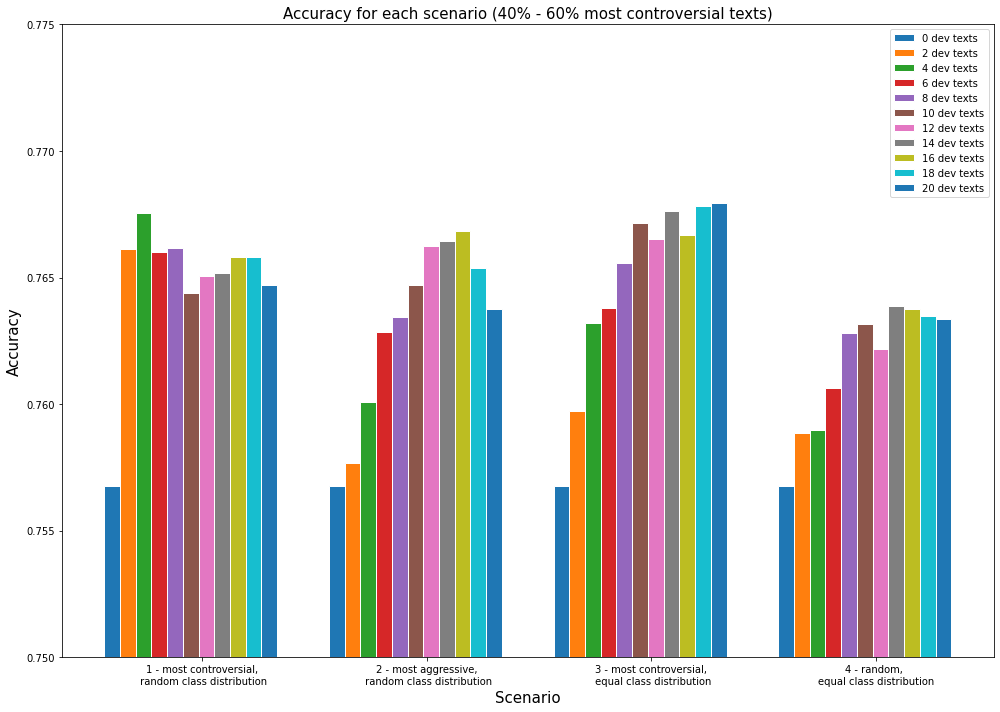

In [90]:
# accuracy for each scenario
accuracy_scores_s_1 = np.empty(11, dtype=np.float32)
accuracy_scores_s_2 = np.empty(11, dtype=np.float32)
accuracy_scores_s_3 = np.empty(11, dtype=np.float32)
accuracy_scores_s_4 = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    accuracy_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    accuracy_scores_s_2[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    accuracy_scores_s_3[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    accuracy_scores_s_4[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['accuracy'].mean()

width = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(1, 21, 5)

accuracy_scores = [accuracy_scores_s_1, accuracy_scores_s_2, accuracy_scores_s_3, accuracy_scores_s_4]

plt.bar(r1, [score[0] for score in accuracy_scores], width=width, edgecolor='white', label='0 dev texts')
plt.bar(r1 + 0.35, [score[1] for score in accuracy_scores], width=width, edgecolor='white', label='2 dev texts')
plt.bar(r1 + 2*0.35, [score[2] for score in accuracy_scores], width=width, edgecolor='white', label='4 dev texts')
plt.bar(r1 + 3*0.35, [score[3] for score in accuracy_scores], width=width, edgecolor='white', label='6 dev texts')
plt.bar(r1 + 4*0.35, [score[4] for score in accuracy_scores], width=width, edgecolor='white', label='8 dev texts')
plt.bar(r1 + 5*0.35, [score[5] for score in accuracy_scores], width=width, edgecolor='white', label='10 dev texts')
plt.bar(r1 + 6*0.35, [score[6] for score in accuracy_scores], width=width, edgecolor='white', label='12 dev texts')
plt.bar(r1 + 7*0.35, [score[7] for score in accuracy_scores], width=width, edgecolor='white', label='14 dev texts')
plt.bar(r1 + 8*0.35, [score[8] for score in accuracy_scores], width=width, edgecolor='white', label='16 dev texts')
plt.bar(r1 + 9*0.35, [score[9] for score in accuracy_scores], width=width, edgecolor='white', label='18 dev texts')
plt.bar(r1 + 10*0.35, [score[10] for score in accuracy_scores], width=width, edgecolor='white', label='20 dev texts')

plt.title('Accuracy for each scenario (40% - 60% most controversial texts)', fontsize=15)
plt.xlabel("Scenario", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xticks(list(range(3, 21, 5)), ['1 - most controversial,\n random class distribution',
                                   '2 - most aggressive,\n random class distribution',
                                   '3 - most controversial,\n equal class distribution',
                                   '4 - random, \nequal class distribution'])
plt.ylim(0.75, 0.775)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)


fig.tight_layout()

plt.show()

<h3>Results on 60%-80% most controversial texts</h3>

In [92]:
def get_scenario_results():
    result_df = pd.DataFrame()
    for scenario_number in [1, 2, 3, 4]:
        for dev_texts in [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]:

            for fold in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:

                with open(f'../data/partly_controversial_results/60_80/scenario_{scenario_number}/controversial_60_80_results_{scenario_number}_{dev_texts}_{fold}.pkl', 'rb') as f:
                    data = pkl.load(f)

                result_df = result_df.append({'scenario': scenario_number,
                                              'dev_texts': dev_texts,
                                              'fold': fold,
                                              '0_precision': data['0']['precision'],
                                              '0_recall': data['0']['recall'],
                                              '0_f1-score': data['0']['f1-score'],
                                              '0_support': data['0']['support'],
                                              '1_precision': data['1']['precision'],
                                              '1_recall': data['1']['recall'],
                                              '1_f1-score': data['1']['f1-score'],
                                              '1_support': data['1']['support'],
                                              'accuracy': data['accuracy'],
                                              'macro_avg_precision': data['macro avg']['precision'],
                                              'macro_avg_recall': data['macro avg']['recall'],
                                              'macro_avg_f1-score': data['macro avg']['f1-score'],
                                              'macro_avg_support': data['macro avg']['support'],
                                              'weighted_avg_precision': data['weighted avg']['precision'],
                                              'weighted_avg_recall': data['weighted avg']['recall'],
                                              'weighted_avg_f1-score': data['weighted avg']['f1-score'],
                                              'weighted_avg_support': data['weighted avg']['support']}, 
                                             ignore_index=True)
            
    return result_df

In [93]:
df = get_scenario_results()
df

,0_f1-score,0_precision,0_recall,0_support,1_f1-score,1_precision,1_recall,1_support,accuracy,dev_texts,fold,macro_avg_f1-score,macro_avg_precision,macro_avg_recall,macro_avg_support,scenario,weighted_avg_f1-score,weighted_avg_precision,weighted_avg_recall,weighted_avg_support
0,0.898534,0.836286,0.970794,2431.0,0.527063,0.807065,0.391304,759.0,0.832915,0.0,1.0,0.712799,0.821676,0.681049,3190.0,1.0,0.810150,0.829334,0.832915,3190.0
1,0.910754,0.854291,0.975210,2501.0,0.563869,0.832884,0.426207,725.0,0.851829,0.0,2.0,0.737311,0.843587,0.700708,3226.0,1.0,0.832796,0.849480,0.851829,3226.0
2,0.899557,0.839710,0.968588,2515.0,0.532646,0.796915,0.400000,775.0,0.834650,0.0,3.0,0.716101,0.818313,0.684294,3290.0,1.0,0.813127,0.829629,0.834650,3290.0
3,0.896415,0.839406,0.961732,2587.0,0.534413,0.769231,0.409429,806.0,0.830533,0.0,4.0,0.715414,0.804318,0.685581,3393.0,1.0,0.810422,0.822736,0.830533,3393.0
4,0.914995,0.863997,0.972391,2463.0,0.574163,0.815217,0.443131,677.0,0.858280,0.0,5.0,0.744579,0.839607,0.707761,3140.0,1.0,0.841510,0.853480,0.858280,3140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0.901490,0.843535,0.967997,2406.0,0.523854,0.784314,0.393258,712.0,0.836754,20.0,6.0,0.712672,0.813924,0.680628,3118.0,4.0,0.815256,0.830012,0.836754,3118.0
436,0.907262,0.855467,0.965732,2568.0,0.561039,0.786408,0.436070,743.0,0.846874,20.0,7.0,0.734150,0.820938,0.700901,3311.0,4.0,0.829568,0.839970,0.846874,3311.0
437,0.912434,0.859643,0.972132,2476.0,0.561670,0.810959,0.429608,689.0,0.854028,20.0,8.0,0.737052,0.835301,0.700870,3165.0,4.0,0.836075,0.849045,0.854028,3165.0
438,0.906193,0.855118,0.963757,2566.0,0.571906,0.786207,0.449409,761.0,0.846108,20.0,9.0,0.739050,0.820662,0.706583,3327.0,4.0,0.829730,0.839355,0.846108,3327.0


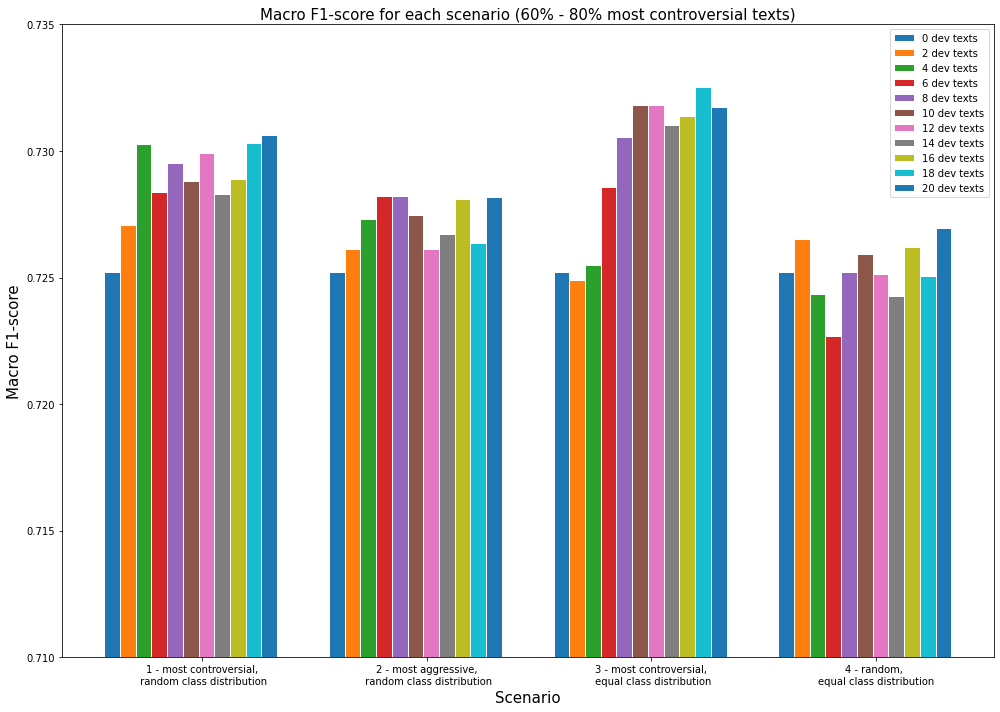

In [98]:
# macro f1-score for each scenario
avg_f1_scores_s_1 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_2 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_3 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_4 = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    avg_f1_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    avg_f1_scores_s_2[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    avg_f1_scores_s_3[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    avg_f1_scores_s_4[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()

width = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(1, 21, 5)

avg_f1_scores = [avg_f1_scores_s_1, avg_f1_scores_s_2, avg_f1_scores_s_3, avg_f1_scores_s_4]

plt.bar(r1, [score[0] for score in avg_f1_scores], width=width, edgecolor='white', label='0 dev texts')
plt.bar(r1 + 0.35, [score[1] for score in avg_f1_scores], width=width, edgecolor='white', label='2 dev texts')
plt.bar(r1 + 2*0.35, [score[2] for score in avg_f1_scores], width=width, edgecolor='white', label='4 dev texts')
plt.bar(r1 + 3*0.35, [score[3] for score in avg_f1_scores], width=width, edgecolor='white', label='6 dev texts')
plt.bar(r1 + 4*0.35, [score[4] for score in avg_f1_scores], width=width, edgecolor='white', label='8 dev texts')
plt.bar(r1 + 5*0.35, [score[5] for score in avg_f1_scores], width=width, edgecolor='white', label='10 dev texts')
plt.bar(r1 + 6*0.35, [score[6] for score in avg_f1_scores], width=width, edgecolor='white', label='12 dev texts')
plt.bar(r1 + 7*0.35, [score[7] for score in avg_f1_scores], width=width, edgecolor='white', label='14 dev texts')
plt.bar(r1 + 8*0.35, [score[8] for score in avg_f1_scores], width=width, edgecolor='white', label='16 dev texts')
plt.bar(r1 + 9*0.35, [score[9] for score in avg_f1_scores], width=width, edgecolor='white', label='18 dev texts')
plt.bar(r1 + 10*0.35, [score[10] for score in avg_f1_scores], width=width, edgecolor='white', label='20 dev texts')

plt.title('Macro F1-score for each scenario (60% - 80% most controversial texts)', fontsize=15)
plt.xlabel("Scenario", fontsize=15)
plt.ylabel("Macro F1-score", fontsize=15)
plt.xticks(list(range(3, 21, 5)), ['1 - most controversial,\n random class distribution',
                                   '2 - most aggressive,\n random class distribution',
                                   '3 - most controversial,\n equal class distribution',
                                   '4 - random, \nequal class distribution'])
plt.ylim(0.71, 0.735)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)


fig.tight_layout()
# plt.gcf().subplots_adjust(bottom=0.30)
# plt.savefig("macro_f1_each_scenario.png", dpi=300)

plt.show()

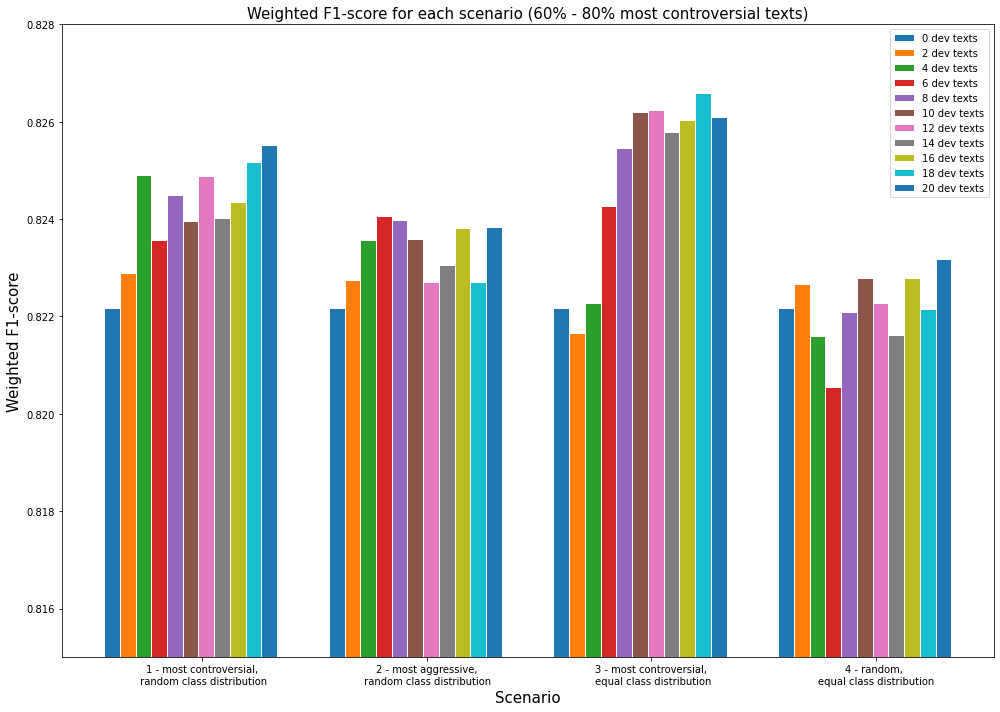

In [109]:
# weighted f1-score for each scenario
avg_f1_scores_s_1 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_2 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_3 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_4 = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    avg_f1_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    avg_f1_scores_s_2[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    avg_f1_scores_s_3[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    avg_f1_scores_s_4[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()

width = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(1, 21, 5)

avg_f1_scores = [avg_f1_scores_s_1, avg_f1_scores_s_2, avg_f1_scores_s_3, avg_f1_scores_s_4]

plt.bar(r1, [score[0] for score in avg_f1_scores], width=width, edgecolor='white', label='0 dev texts')
plt.bar(r1 + 0.35, [score[1] for score in avg_f1_scores], width=width, edgecolor='white', label='2 dev texts')
plt.bar(r1 + 2*0.35, [score[2] for score in avg_f1_scores], width=width, edgecolor='white', label='4 dev texts')
plt.bar(r1 + 3*0.35, [score[3] for score in avg_f1_scores], width=width, edgecolor='white', label='6 dev texts')
plt.bar(r1 + 4*0.35, [score[4] for score in avg_f1_scores], width=width, edgecolor='white', label='8 dev texts')
plt.bar(r1 + 5*0.35, [score[5] for score in avg_f1_scores], width=width, edgecolor='white', label='10 dev texts')
plt.bar(r1 + 6*0.35, [score[6] for score in avg_f1_scores], width=width, edgecolor='white', label='12 dev texts')
plt.bar(r1 + 7*0.35, [score[7] for score in avg_f1_scores], width=width, edgecolor='white', label='14 dev texts')
plt.bar(r1 + 8*0.35, [score[8] for score in avg_f1_scores], width=width, edgecolor='white', label='16 dev texts')
plt.bar(r1 + 9*0.35, [score[9] for score in avg_f1_scores], width=width, edgecolor='white', label='18 dev texts')
plt.bar(r1 + 10*0.35, [score[10] for score in avg_f1_scores], width=width, edgecolor='white', label='20 dev texts')

plt.title('Weighted F1-score for each scenario (60% - 80% most controversial texts)', fontsize=15)
plt.xlabel("Scenario", fontsize=15)
plt.ylabel("Weighted F1-score", fontsize=15)
plt.xticks(list(range(3, 21, 5)), ['1 - most controversial,\n random class distribution',
                                   '2 - most aggressive,\n random class distribution',
                                   '3 - most controversial,\n equal class distribution',
                                   '4 - random, \nequal class distribution'])
plt.ylim(0.815, 0.828)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)


fig.tight_layout()

plt.show()

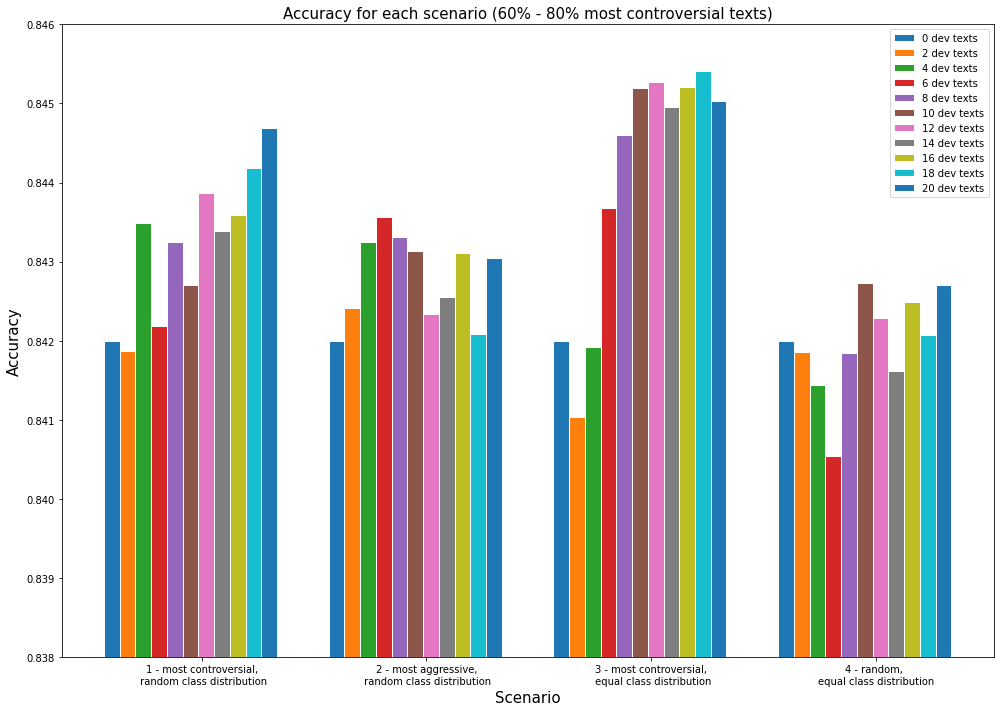

In [112]:
# accuracy for each scenario
accuracy_scores_s_1 = np.empty(11, dtype=np.float32)
accuracy_scores_s_2 = np.empty(11, dtype=np.float32)
accuracy_scores_s_3 = np.empty(11, dtype=np.float32)
accuracy_scores_s_4 = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    accuracy_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    accuracy_scores_s_2[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    accuracy_scores_s_3[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    accuracy_scores_s_4[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['accuracy'].mean()

width = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(1, 21, 5)

accuracy_scores = [accuracy_scores_s_1, accuracy_scores_s_2, accuracy_scores_s_3, accuracy_scores_s_4]

plt.bar(r1, [score[0] for score in accuracy_scores], width=width, edgecolor='white', label='0 dev texts')
plt.bar(r1 + 0.35, [score[1] for score in accuracy_scores], width=width, edgecolor='white', label='2 dev texts')
plt.bar(r1 + 2*0.35, [score[2] for score in accuracy_scores], width=width, edgecolor='white', label='4 dev texts')
plt.bar(r1 + 3*0.35, [score[3] for score in accuracy_scores], width=width, edgecolor='white', label='6 dev texts')
plt.bar(r1 + 4*0.35, [score[4] for score in accuracy_scores], width=width, edgecolor='white', label='8 dev texts')
plt.bar(r1 + 5*0.35, [score[5] for score in accuracy_scores], width=width, edgecolor='white', label='10 dev texts')
plt.bar(r1 + 6*0.35, [score[6] for score in accuracy_scores], width=width, edgecolor='white', label='12 dev texts')
plt.bar(r1 + 7*0.35, [score[7] for score in accuracy_scores], width=width, edgecolor='white', label='14 dev texts')
plt.bar(r1 + 8*0.35, [score[8] for score in accuracy_scores], width=width, edgecolor='white', label='16 dev texts')
plt.bar(r1 + 9*0.35, [score[9] for score in accuracy_scores], width=width, edgecolor='white', label='18 dev texts')
plt.bar(r1 + 10*0.35, [score[10] for score in accuracy_scores], width=width, edgecolor='white', label='20 dev texts')

plt.title('Accuracy for each scenario (60% - 80% most controversial texts)', fontsize=15)
plt.xlabel("Scenario", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xticks(list(range(3, 21, 5)), ['1 - most controversial,\n random class distribution',
                                   '2 - most aggressive,\n random class distribution',
                                   '3 - most controversial,\n equal class distribution',
                                   '4 - random, \nequal class distribution'])
plt.ylim(0.838, 0.846)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)


fig.tight_layout()

plt.show()

<h3>Results on 80%-100% most controversial texts</h3>

In [113]:
def get_scenario_results():
    result_df = pd.DataFrame()
    for scenario_number in [1, 2, 3, 4]:
        for dev_texts in [0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]:

            for fold in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:

                with open(f'../data/partly_controversial_results/80_100/scenario_{scenario_number}/controversial_80_100_results_{scenario_number}_{dev_texts}_{fold}.pkl', 'rb') as f:
                    data = pkl.load(f)

                result_df = result_df.append({'scenario': scenario_number,
                                              'dev_texts': dev_texts,
                                              'fold': fold,
                                              '0_precision': data['0']['precision'],
                                              '0_recall': data['0']['recall'],
                                              '0_f1-score': data['0']['f1-score'],
                                              '0_support': data['0']['support'],
                                              '1_precision': data['1']['precision'],
                                              '1_recall': data['1']['recall'],
                                              '1_f1-score': data['1']['f1-score'],
                                              '1_support': data['1']['support'],
                                              'accuracy': data['accuracy'],
                                              'macro_avg_precision': data['macro avg']['precision'],
                                              'macro_avg_recall': data['macro avg']['recall'],
                                              'macro_avg_f1-score': data['macro avg']['f1-score'],
                                              'macro_avg_support': data['macro avg']['support'],
                                              'weighted_avg_precision': data['weighted avg']['precision'],
                                              'weighted_avg_recall': data['weighted avg']['recall'],
                                              'weighted_avg_f1-score': data['weighted avg']['f1-score'],
                                              'weighted_avg_support': data['weighted avg']['support']}, 
                                             ignore_index=True)
            
    return result_df

In [114]:
df = get_scenario_results()
df

,0_f1-score,0_precision,0_recall,0_support,1_f1-score,1_precision,1_recall,1_support,accuracy,dev_texts,fold,macro_avg_f1-score,macro_avg_precision,macro_avg_recall,macro_avg_support,scenario,weighted_avg_f1-score,weighted_avg_precision,weighted_avg_recall,weighted_avg_support
0,0.952095,0.918799,0.987894,2726.0,0.625173,0.872587,0.487069,464.0,0.915047,0.0,1.0,0.788634,0.895693,0.737482,3190.0,1.0,0.904542,0.912077,0.915047,3190.0
1,0.955929,0.925813,0.988069,2766.0,0.656676,0.879562,0.523913,460.0,0.921885,0.0,2.0,0.806302,0.902688,0.755991,3226.0,1.0,0.913258,0.919218,0.921885,3226.0
2,0.954678,0.923561,0.987965,2825.0,0.638472,0.873134,0.503226,465.0,0.919453,0.0,3.0,0.796575,0.898347,0.745595,3290.0,1.0,0.909986,0.916433,0.919453,3290.0
3,0.947404,0.908797,0.989437,2840.0,0.634660,0.900332,0.490054,553.0,0.908046,0.0,4.0,0.791032,0.904565,0.739745,3393.0,1.0,0.896432,0.907417,0.908046,3393.0
4,0.951937,0.918975,0.987351,2688.0,0.619318,0.865079,0.482301,452.0,0.914650,0.0,5.0,0.785628,0.892027,0.734826,3140.0,1.0,0.904057,0.911217,0.914650,3140.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,0.953590,0.921514,0.987979,2662.0,0.644444,0.878788,0.508772,456.0,0.917896,20.0,6.0,0.799017,0.900151,0.748375,3118.0,4.0,0.908378,0.915265,0.917896,3118.0
436,0.955071,0.927297,0.984561,2850.0,0.646113,0.845614,0.522777,461.0,0.920266,20.0,7.0,0.800592,0.886455,0.753669,3311.0,4.0,0.912054,0.915924,0.920266,3311.0
437,0.958296,0.929112,0.989373,2729.0,0.661871,0.888031,0.527523,436.0,0.925750,20.0,8.0,0.810083,0.908572,0.758448,3165.0,4.0,0.917462,0.923453,0.925750,3165.0
438,0.952268,0.919921,0.986972,2840.0,0.633638,0.867857,0.498973,487.0,0.915540,20.0,9.0,0.792953,0.893889,0.742973,3327.0,4.0,0.905627,0.912300,0.915540,3327.0


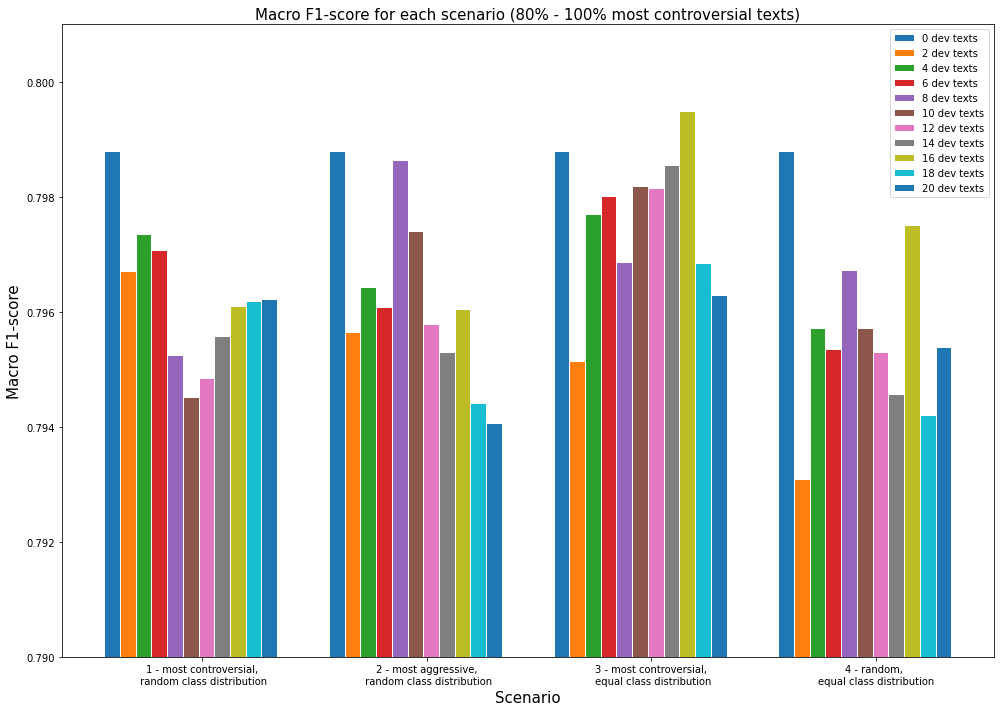

In [122]:
# macro f1-score for each scenario
avg_f1_scores_s_1 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_2 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_3 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_4 = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    avg_f1_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    avg_f1_scores_s_2[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    avg_f1_scores_s_3[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()
    avg_f1_scores_s_4[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['macro_avg_f1-score'].mean()

width = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(1, 21, 5)

avg_f1_scores = [avg_f1_scores_s_1, avg_f1_scores_s_2, avg_f1_scores_s_3, avg_f1_scores_s_4]

plt.bar(r1, [score[0] for score in avg_f1_scores], width=width, edgecolor='white', label='0 dev texts')
plt.bar(r1 + 0.35, [score[1] for score in avg_f1_scores], width=width, edgecolor='white', label='2 dev texts')
plt.bar(r1 + 2*0.35, [score[2] for score in avg_f1_scores], width=width, edgecolor='white', label='4 dev texts')
plt.bar(r1 + 3*0.35, [score[3] for score in avg_f1_scores], width=width, edgecolor='white', label='6 dev texts')
plt.bar(r1 + 4*0.35, [score[4] for score in avg_f1_scores], width=width, edgecolor='white', label='8 dev texts')
plt.bar(r1 + 5*0.35, [score[5] for score in avg_f1_scores], width=width, edgecolor='white', label='10 dev texts')
plt.bar(r1 + 6*0.35, [score[6] for score in avg_f1_scores], width=width, edgecolor='white', label='12 dev texts')
plt.bar(r1 + 7*0.35, [score[7] for score in avg_f1_scores], width=width, edgecolor='white', label='14 dev texts')
plt.bar(r1 + 8*0.35, [score[8] for score in avg_f1_scores], width=width, edgecolor='white', label='16 dev texts')
plt.bar(r1 + 9*0.35, [score[9] for score in avg_f1_scores], width=width, edgecolor='white', label='18 dev texts')
plt.bar(r1 + 10*0.35, [score[10] for score in avg_f1_scores], width=width, edgecolor='white', label='20 dev texts')

plt.title('Macro F1-score for each scenario (80% - 100% most controversial texts)', fontsize=15)
plt.xlabel("Scenario", fontsize=15)
plt.ylabel("Macro F1-score", fontsize=15)
plt.xticks(list(range(3, 21, 5)), ['1 - most controversial,\n random class distribution',
                                   '2 - most aggressive,\n random class distribution',
                                   '3 - most controversial,\n equal class distribution',
                                   '4 - random, \nequal class distribution'])
plt.ylim(0.79, 0.801)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)


fig.tight_layout()
# plt.gcf().subplots_adjust(bottom=0.30)
# plt.savefig("macro_f1_each_scenario.png", dpi=300)

plt.show()

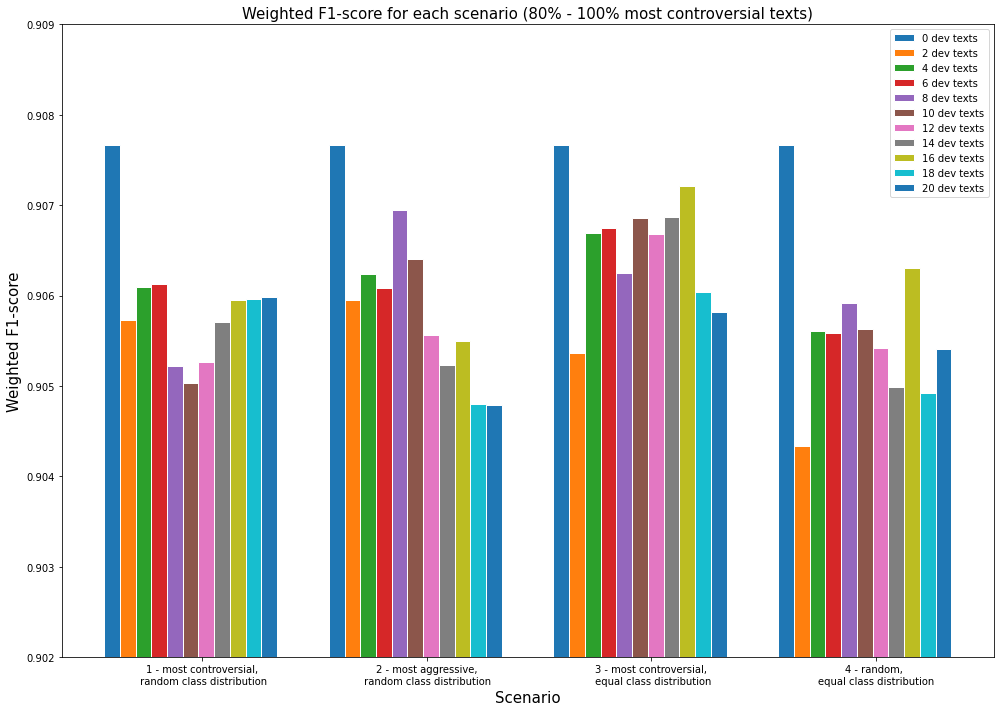

In [127]:
# weighted f1-score for each scenario
avg_f1_scores_s_1 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_2 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_3 = np.empty(11, dtype=np.float32)
avg_f1_scores_s_4 = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    avg_f1_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    avg_f1_scores_s_2[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    avg_f1_scores_s_3[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()
    avg_f1_scores_s_4[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['weighted_avg_f1-score'].mean()

width = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(1, 21, 5)

avg_f1_scores = [avg_f1_scores_s_1, avg_f1_scores_s_2, avg_f1_scores_s_3, avg_f1_scores_s_4]

plt.bar(r1, [score[0] for score in avg_f1_scores], width=width, edgecolor='white', label='0 dev texts')
plt.bar(r1 + 0.35, [score[1] for score in avg_f1_scores], width=width, edgecolor='white', label='2 dev texts')
plt.bar(r1 + 2*0.35, [score[2] for score in avg_f1_scores], width=width, edgecolor='white', label='4 dev texts')
plt.bar(r1 + 3*0.35, [score[3] for score in avg_f1_scores], width=width, edgecolor='white', label='6 dev texts')
plt.bar(r1 + 4*0.35, [score[4] for score in avg_f1_scores], width=width, edgecolor='white', label='8 dev texts')
plt.bar(r1 + 5*0.35, [score[5] for score in avg_f1_scores], width=width, edgecolor='white', label='10 dev texts')
plt.bar(r1 + 6*0.35, [score[6] for score in avg_f1_scores], width=width, edgecolor='white', label='12 dev texts')
plt.bar(r1 + 7*0.35, [score[7] for score in avg_f1_scores], width=width, edgecolor='white', label='14 dev texts')
plt.bar(r1 + 8*0.35, [score[8] for score in avg_f1_scores], width=width, edgecolor='white', label='16 dev texts')
plt.bar(r1 + 9*0.35, [score[9] for score in avg_f1_scores], width=width, edgecolor='white', label='18 dev texts')
plt.bar(r1 + 10*0.35, [score[10] for score in avg_f1_scores], width=width, edgecolor='white', label='20 dev texts')

plt.title('Weighted F1-score for each scenario (80% - 100% most controversial texts)', fontsize=15)
plt.xlabel("Scenario", fontsize=15)
plt.ylabel("Weighted F1-score", fontsize=15)
plt.xticks(list(range(3, 21, 5)), ['1 - most controversial,\n random class distribution',
                                   '2 - most aggressive,\n random class distribution',
                                   '3 - most controversial,\n equal class distribution',
                                   '4 - random, \nequal class distribution'])
plt.ylim(0.902, 0.909)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)


fig.tight_layout()

plt.show()

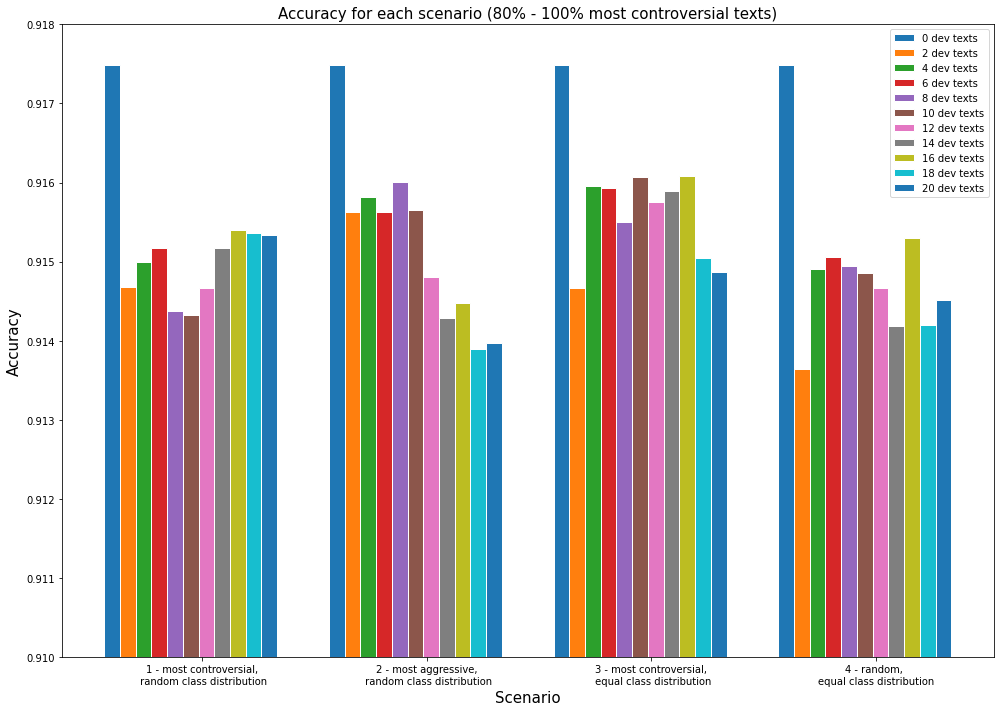

In [130]:
# accuracy for each scenario
accuracy_scores_s_1 = np.empty(11, dtype=np.float32)
accuracy_scores_s_2 = np.empty(11, dtype=np.float32)
accuracy_scores_s_3 = np.empty(11, dtype=np.float32)
accuracy_scores_s_4 = np.empty(11, dtype=np.float32)

for dev_texts in range(0, 21, 2):
    accuracy_scores_s_1[dev_texts // 2] = df[(df.scenario == 1) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    accuracy_scores_s_2[dev_texts // 2] = df[(df.scenario == 2) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    accuracy_scores_s_3[dev_texts // 2] = df[(df.scenario == 3) & (df.dev_texts == dev_texts)]['accuracy'].mean()
    accuracy_scores_s_4[dev_texts // 2] = df[(df.scenario == 4) & (df.dev_texts == dev_texts)]['accuracy'].mean()

width = 0.35  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(1, 21, 5)

accuracy_scores = [accuracy_scores_s_1, accuracy_scores_s_2, accuracy_scores_s_3, accuracy_scores_s_4]

plt.bar(r1, [score[0] for score in accuracy_scores], width=width, edgecolor='white', label='0 dev texts')
plt.bar(r1 + 0.35, [score[1] for score in accuracy_scores], width=width, edgecolor='white', label='2 dev texts')
plt.bar(r1 + 2*0.35, [score[2] for score in accuracy_scores], width=width, edgecolor='white', label='4 dev texts')
plt.bar(r1 + 3*0.35, [score[3] for score in accuracy_scores], width=width, edgecolor='white', label='6 dev texts')
plt.bar(r1 + 4*0.35, [score[4] for score in accuracy_scores], width=width, edgecolor='white', label='8 dev texts')
plt.bar(r1 + 5*0.35, [score[5] for score in accuracy_scores], width=width, edgecolor='white', label='10 dev texts')
plt.bar(r1 + 6*0.35, [score[6] for score in accuracy_scores], width=width, edgecolor='white', label='12 dev texts')
plt.bar(r1 + 7*0.35, [score[7] for score in accuracy_scores], width=width, edgecolor='white', label='14 dev texts')
plt.bar(r1 + 8*0.35, [score[8] for score in accuracy_scores], width=width, edgecolor='white', label='16 dev texts')
plt.bar(r1 + 9*0.35, [score[9] for score in accuracy_scores], width=width, edgecolor='white', label='18 dev texts')
plt.bar(r1 + 10*0.35, [score[10] for score in accuracy_scores], width=width, edgecolor='white', label='20 dev texts')

plt.title('Accuracy for each scenario (80% - 100% most controversial texts)', fontsize=15)
plt.xlabel("Scenario", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.xticks(list(range(3, 21, 5)), ['1 - most controversial,\n random class distribution',
                                   '2 - most aggressive,\n random class distribution',
                                   '3 - most controversial,\n equal class distribution',
                                   '4 - random, \nequal class distribution'])
plt.ylim(0.91, 0.918)
plt.legend()
fig = plt.gcf()
fig.set_size_inches(14,10)


fig.tight_layout()

plt.show()